<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_TDA%2B_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝Projet TDA + Signature, de Jean Marius KOMBOU**

**Base de données de motifs EMG** : Pour l'enregistrement des motifs, un bracelet MYO Thalmic est utilisé, porté sur l'avant-bras de l'utilisateur, ainsi qu'un PC avec un récepteur Bluetooth. Le bracelet est équipé de huit capteurs espacés uniformément autour de l'avant-bras qui acquièrent simultanément des signaux myographiques. Les signaux sont envoyés via une interface Bluetooth vers un PC.

Les données brutes d'EMG pour 36 sujets sont présentées, tandis qu'ils réalisaient une série de gestes statiques de la main. Chaque sujet effectue deux séries, chacune composée de six (ou sept) gestes de base. Chaque geste a été réalisé pendant 3 secondes avec une pause de 3 secondes entre les gestes.

Chaque fichier est composé de 10 colonnes :

🔹 Une colonne Temps (`temps`) - temps en ms ;

🔹8 colonnes de canaux EMG du bracelet MYO Thalmic (`channel1`... `channel8`) :  

*   0 - données non marquées `channel1`,
*   1 - main au repos `channel2`,
*   2 - main serrée en poing `channel3`,
*   3 - flexion du poignet `channel4`,
*   4 - extension du poignet `channel5`,
*   5 - déviations radiales `channel6`,
*   6 - déviations ulnaires `channel7`,
*   7 - paume étendue (le geste n'a pas été effectué par tous les sujets) `channel8`

🔹Une colonne `class` - le label des gestes. On a 7 classes uniques de 0 à 6.


**Objectif: L'objectif principal** est de prédire la valeur de la colonne `class` en fonction des données fournies par les 8 canaux en appliquant les méthodes de TDA.

## **1- Description des données**

In [ ]:
import pandas as pd
# URL du fichier de données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"

# Charger les données dans un DataFrame
data = pd.read_csv(url, sep="\t")

# Afficher les premières lignes du DataFrame pour vérifier
data.head(15)

time  channel1  channel2  channel3  channel4  channel5  channel6  \
0      1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
1      5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   
2      6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
3      7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
4      8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
5      9  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
6     10  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
7     11  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
8     12  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
9     13  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
10    14  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
11    15  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
12    16  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
13    17  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002   
14    18  -0.00001  -0.00001  -0.00006  -0.00005  -0.00003  -0.00003   

    channel7  channel8  class  
0    0.00000  -0.00001      0  
1    0.00000  -0.00001      0  
2   -0.00001   0.00001      0  
3   -0.00001   0.00001      0  
4   -0.00001   0.00001      0  
5   -0.00001   0.00001      0  
6   -0.00001   0.00001      0  
7   -0.00001   0.00001      0  
8   -0.00001   0.00001      0  
9   -0.00001   0.00001      0  
10  -0.00001   0.00001      0  
11  -0.00001   0.00001      0  
12  -0.00001   0.00001      0  
13  -0.00001   0.00001      0  
14  -0.00002  -0.00002      0

Notre jeu de données a **63196** lignes.

In [ ]:
data.shape

(63196, 10)

**🧮 Nombre de classes du jeu de données**

In [ ]:
# Calculer le nombre de classes uniques dans la colonne 'Class'
nombre_classes = data['class'].nunique()

# Afficher le nombre de classes
print("Nombre de classes uniques :", nombre_classes)

# Pour voir la liste des classes uniques
classes_uniques = data['class'].unique()
print("Classes uniques :", classes_uniques)

Nombre de classes uniques : 7
Classes uniques : [0 1 2 3 4 5 6]


En examinant les données, il y a une colonne 'time' avec des valeurs croissantes, et chaque ligne représente des mesures à un moment précis sur huit canaux. Donc il s'agit d'une série **temporelle multivariée** à huit dimensions.

In [ ]:
sumarize = data.describe()
print(sumarize)

               time      channel1      channel2      channel3      channel4  \
count  63196.000000  63196.000000  63196.000000  63196.000000  63196.000000   
mean   32777.490094     -0.000008     -0.000009     -0.000009     -0.000010   
std    18943.835626      0.000144      0.000134      0.000124      0.000155   
min        1.000000     -0.001110     -0.001020     -0.000910     -0.001040   
25%    16340.750000     -0.000030     -0.000040     -0.000050     -0.000040   
50%    32781.500000     -0.000010     -0.000010     -0.000010     -0.000010   
75%    49199.250000      0.000010      0.000020      0.000030      0.000020   
max    65661.000000      0.001270      0.001270      0.001270      0.001270   

           channel5     channel6      channel7      channel8         class  
count  63196.000000  63196.00000  63196.000000  63196.000000  63196.000000  
mean      -0.000012     -0.00001     -0.000008     -0.000008      1.212086  
std        0.000198      0.00016      0.000133      0.000

**Qualité des données**

In [ ]:
# Qualité des données
print("\nValeurs manquantes par colonne:")
print(data.isnull().sum())
print("\nNombre de doublons:")
print(data.duplicated().sum())


Valeurs manquantes par colonne:
time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       0
dtype: int64

Nombre de doublons:
0


Il n'y a pas de valeurs manquantes, pas de doublons.

In [ ]:
distribution_classes = data['class'].value_counts()
print(distribution_classes)

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64


⚖️  La distribution montre un **déséquilibre** important entre les classes. Par exemple, la classe 0 contient 41 272 occurrences, alors que les autres classes en contiennent entre 3 441 et 3 816 occurrences. Cela pourrait poser des problèmes pour l'entraînement de modèles de Machine Learning, car les classes minoritaires risquent d'être sous-représentées dans les prédictions.

La somme de tous les nombres de classe est de (41272+3816+3780+3747+3615+3525+3441)= 63 196, ce qui correspond au nombre de lignes de notre data set (`data.shape = (63 196, 10)`)  

**📊 Histogramme pour les variables numérique**s

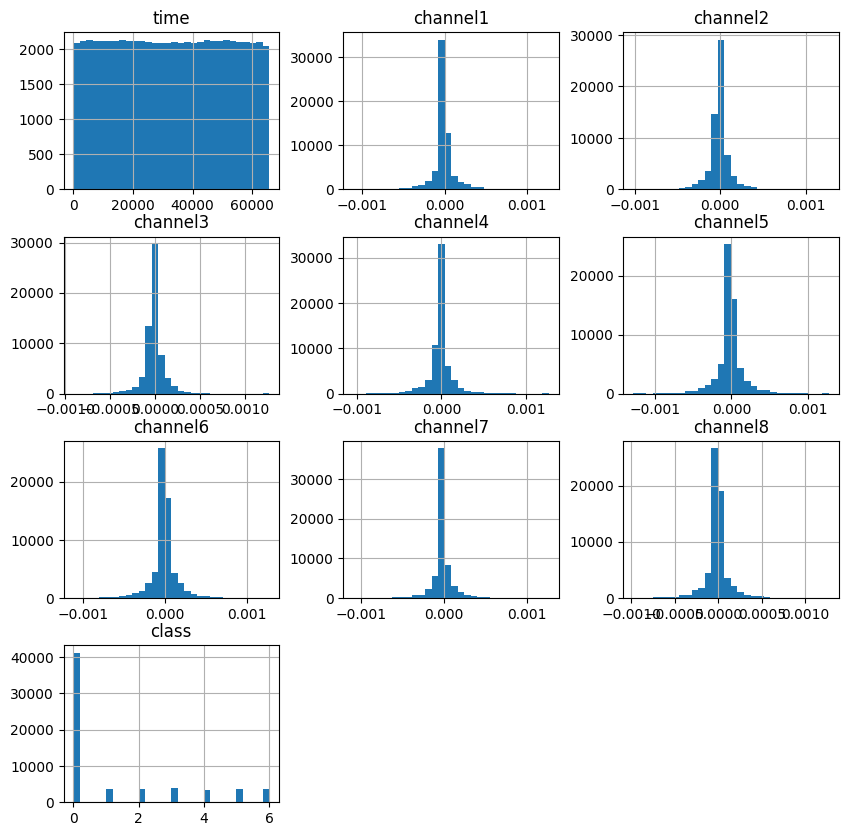

In [ ]:
# Histogramme pour les variables numériques
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 10))
plt.show()

La classe 0 représente des **"données non marquées"** ou une situation de "repos" ou "absence de geste", il est **normal qu'elle soit plus fréquente**, surtout dans les contextes où les gestes spécifiques ne sont exécutés que brièvement et/ou moins fréquemment. Ensuite la classe 3 est la plus fréquente. D'accord que ce n'est pas très visible sur mon histogramme.

**Heatmap**

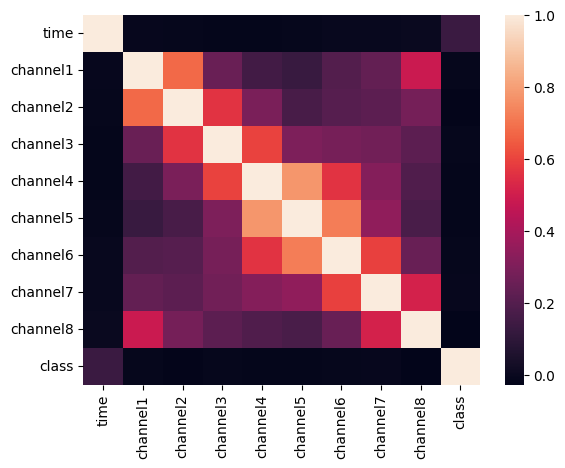

In [ ]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

💡 On observe pas une corrélation entre un channel et class. Il n'y a pas un channel qui a plus d'impact que d'autres sur la classe.

**Corrélation** entre les channels.

In [ ]:
# Calculer la matrice de corrélation entre les channels
correlation_matrix = data.iloc[:, 1:9].corr()
correlation_matrix

channel1  channel2  channel3  channel4  channel5  channel6  \
channel1  1.000000  0.676714  0.250755  0.153744  0.129514  0.196495   
channel2  0.676714  1.000000  0.561955  0.293439  0.167850  0.205321   
channel3  0.250755  0.561955  1.000000  0.597895  0.299820  0.283542   
channel4  0.153744  0.293439  0.597895  1.000000  0.777541  0.561263   
channel5  0.129514  0.167850  0.299820  0.777541  1.000000  0.722278   
channel6  0.196495  0.205321  0.283542  0.561263  0.722278  1.000000   
channel7  0.238019  0.221467  0.271200  0.317886  0.344329  0.593005   
channel8  0.483517  0.280637  0.218356  0.186640  0.171012  0.248792   

          channel7  channel8  
channel1  0.238019  0.483517  
channel2  0.221467  0.280637  
channel3  0.271200  0.218356  
channel4  0.317886  0.186640  
channel5  0.344329  0.171012  
channel6  0.593005  0.248792  
channel7  1.000000  0.514066  
channel8  0.514066  1.000000

On observe une **forte corrélation positive** entre le "channel 4" et le "channel 5", entre "channel 6" et le "channel 5", "channel 1" et le "channel 2".

📊  Voici le **diagramme en barres** empilées montrant la contribution de chaque canal dans les classes respectives. Chaque barre représente une classe et la contribution de chaque canal dans cette classe.

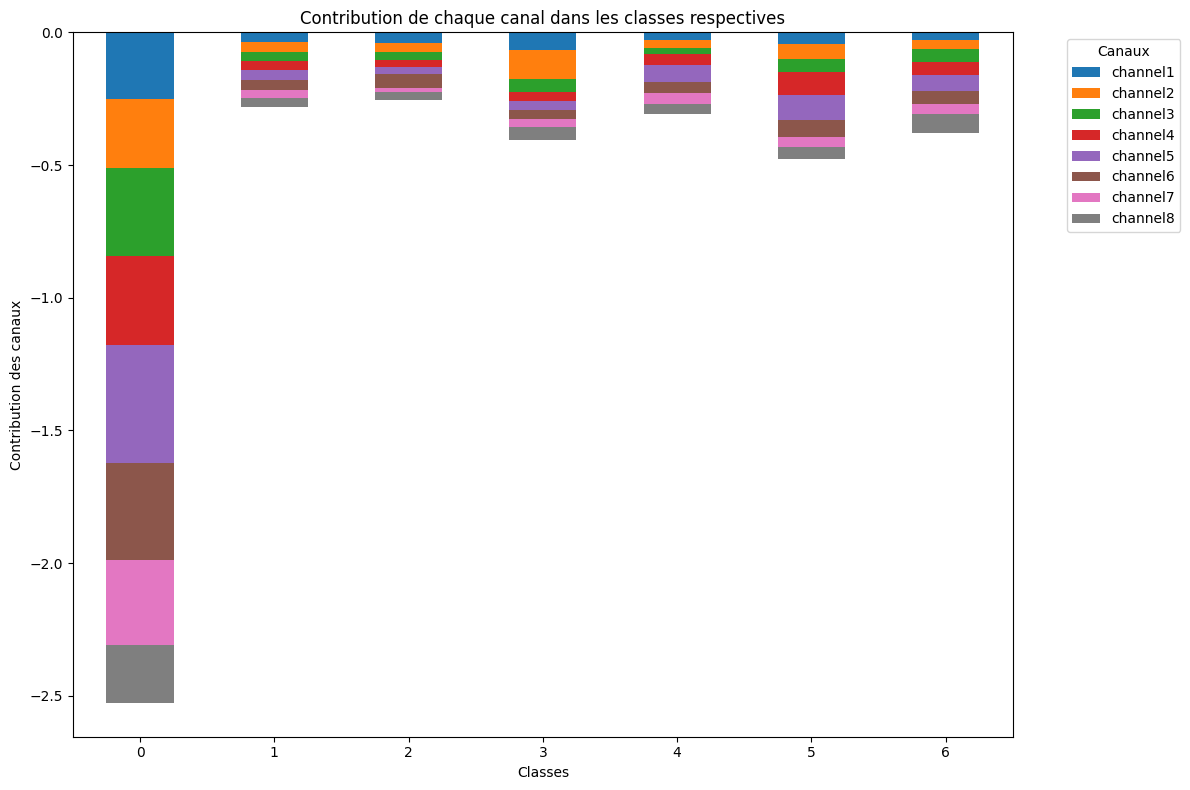

In [ ]:
import matplotlib.pyplot as plt

# Calculer la somme des valeurs par canal pour chaque classe
channel_class_sum = data.iloc[:, 1:9].groupby(data['class']).sum()

# Créer un diagramme en barres montrant la contribution de chaque canal dans les classes respectives
channel_class_sum.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Contribution de chaque canal dans les classes respectives')
plt.xlabel('Classes')
plt.ylabel('Contribution des canaux')
plt.xticks(rotation=0)  # Pour une meilleure lisibilité des labels des classes
plt.legend(title='Canaux', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


On observe que chaque classe contient la **contribution** de tous les channels (canaux) mais à proportions variées.

## **2. Découper la série temporelle de manière à récupérer plusieurs séries à label unique**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])


**Normalisation** : on exclut la colonne `class` car si on normalise la colonne `class`, on va modifiez ses valeurs d'origine, ce qui peut rendre les étiquettes incompréhensibles ou inutilisables pour l'apprentissage supervisé.

In [ ]:
# Vérifier que chaque sous-série a un label unique
for sub in sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []

On **visualise** les sous-séries normalisées pour avoir une idée des motifs qui se repètent.

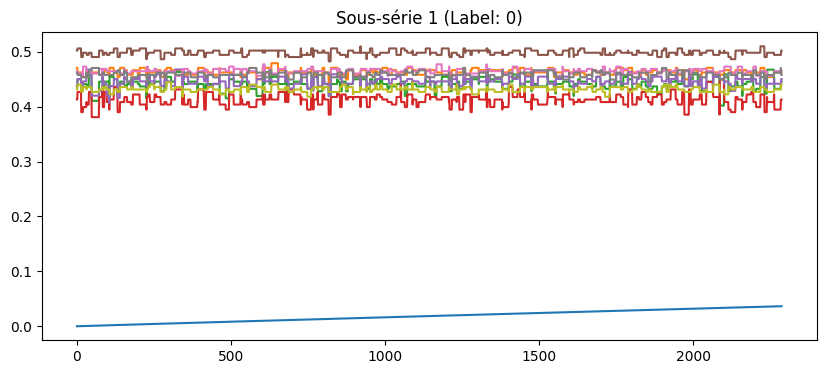

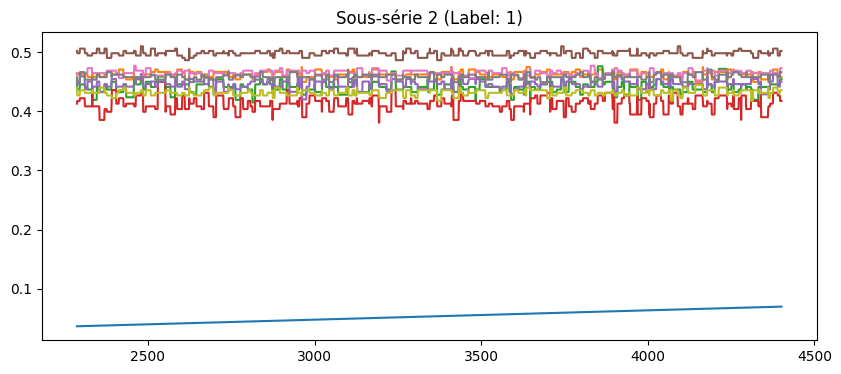

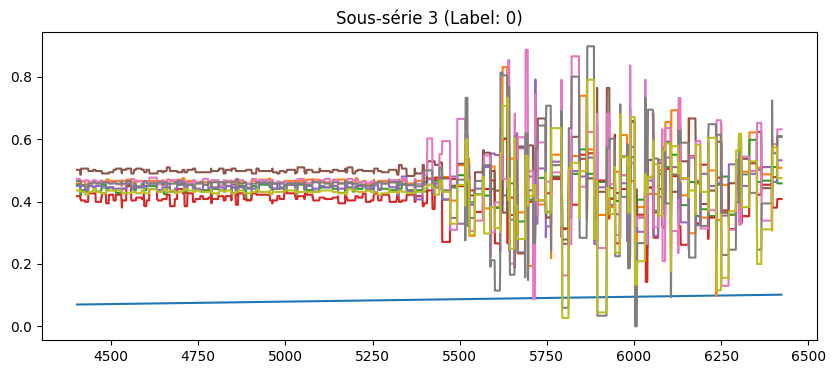

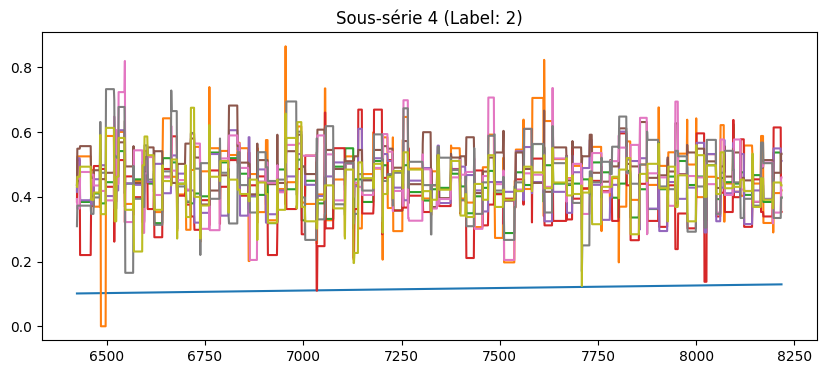

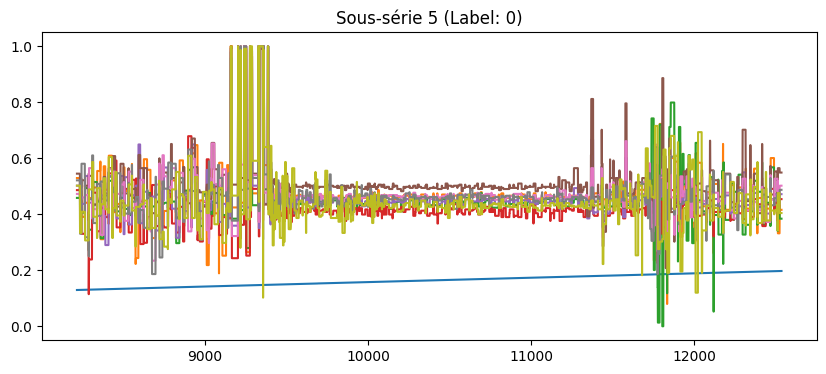

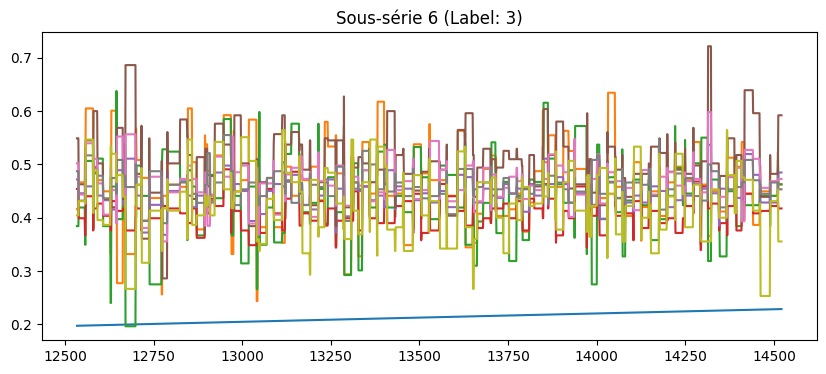

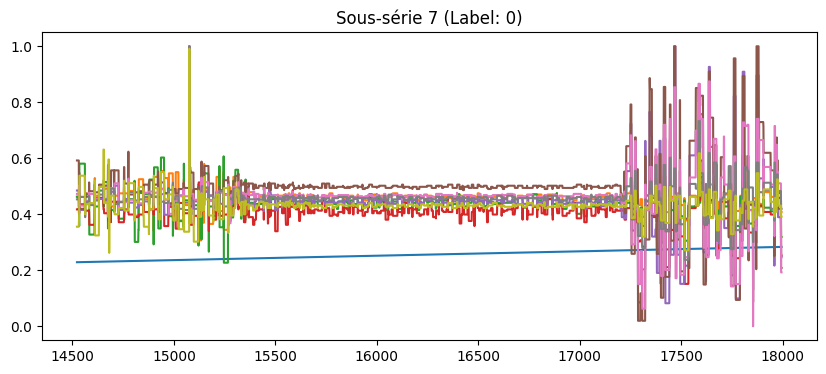

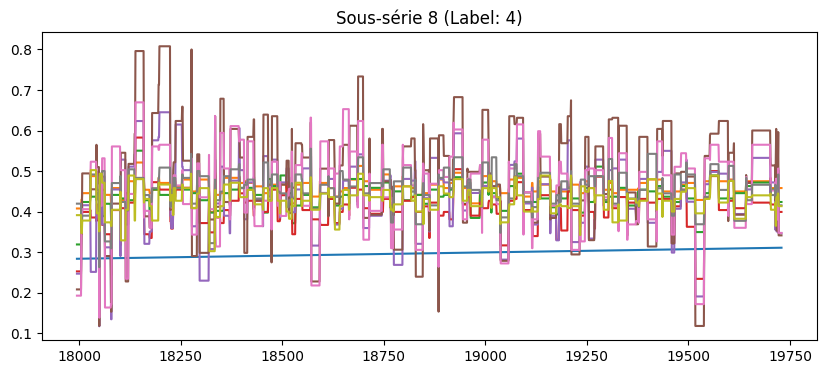

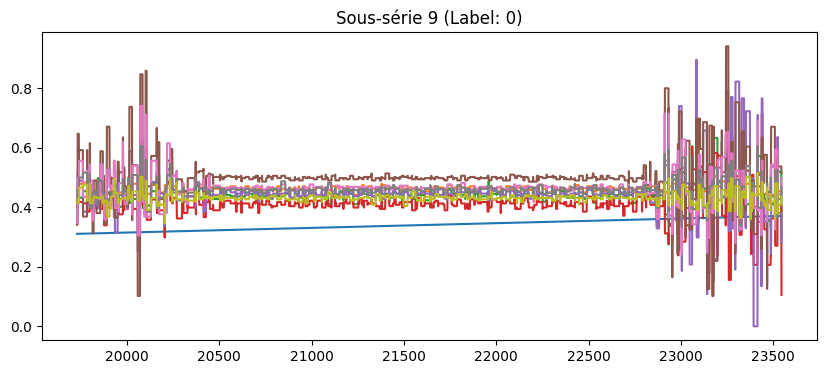

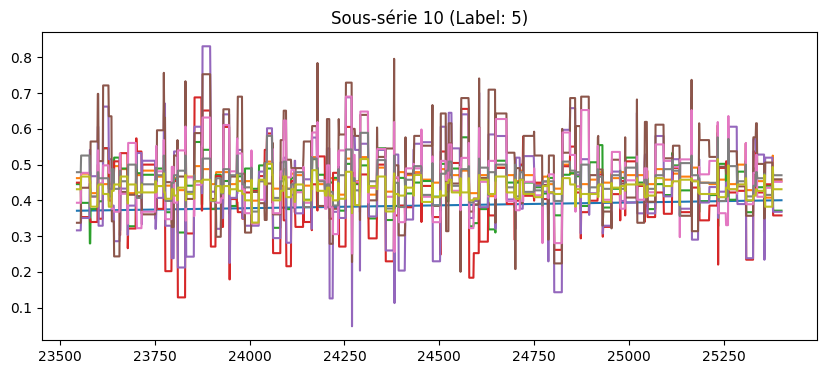

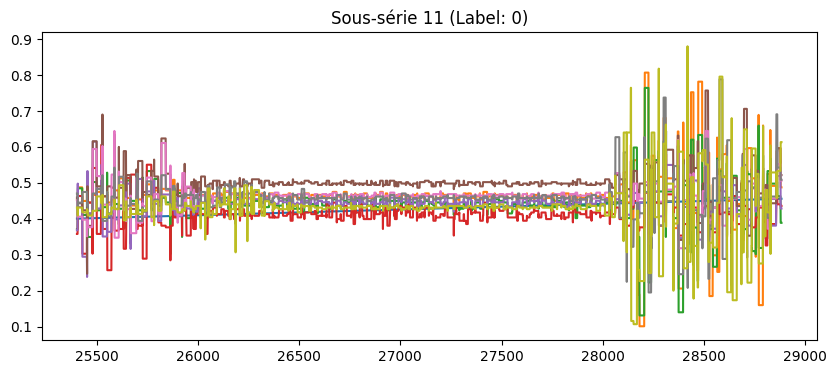

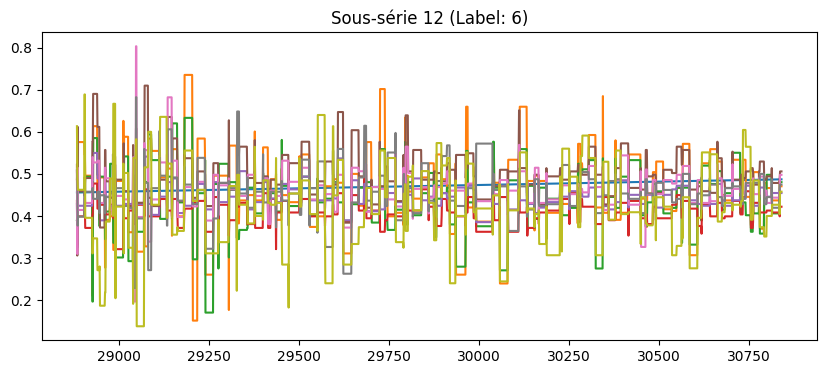

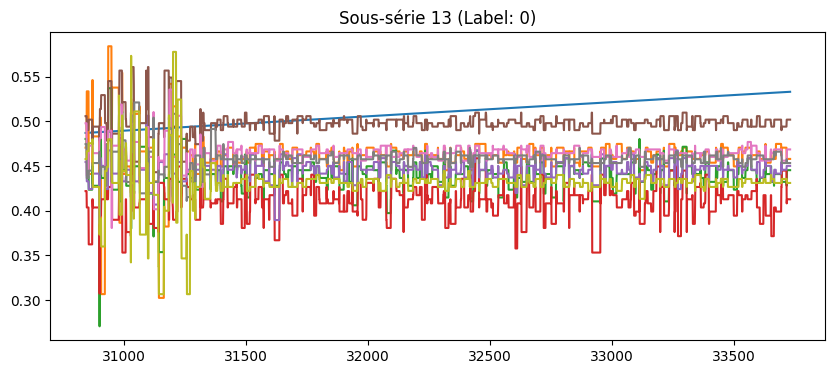

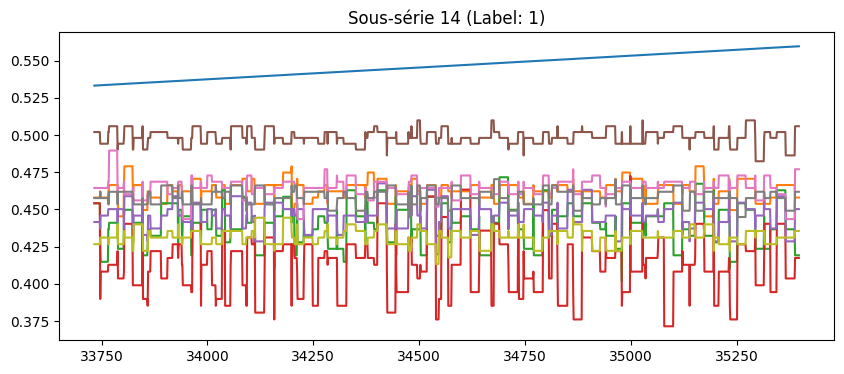

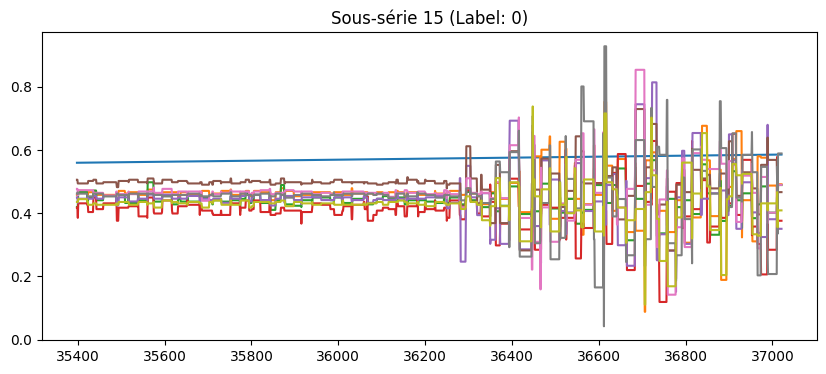

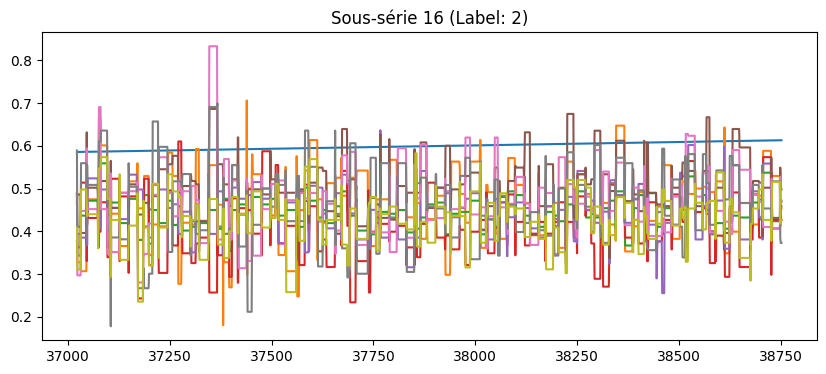

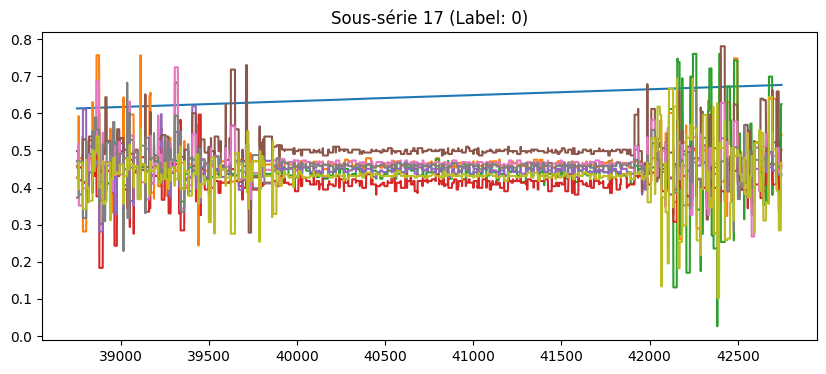

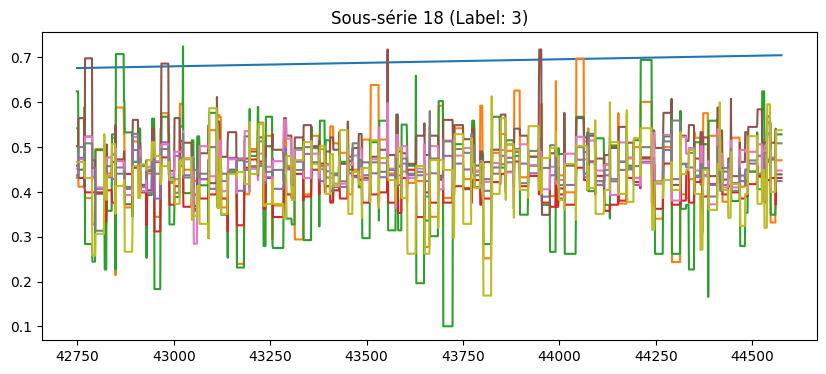

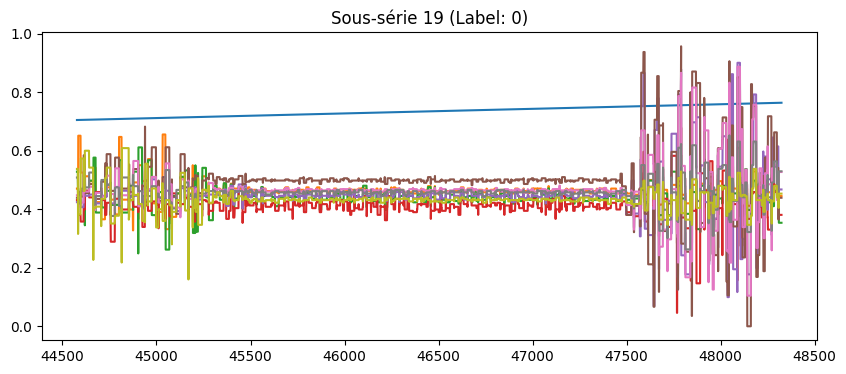

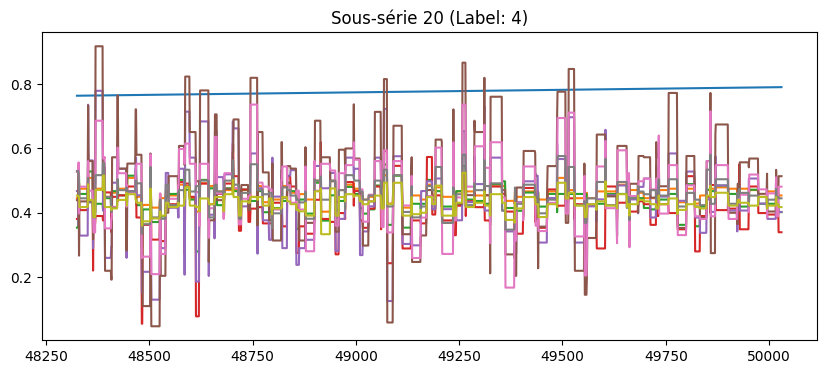

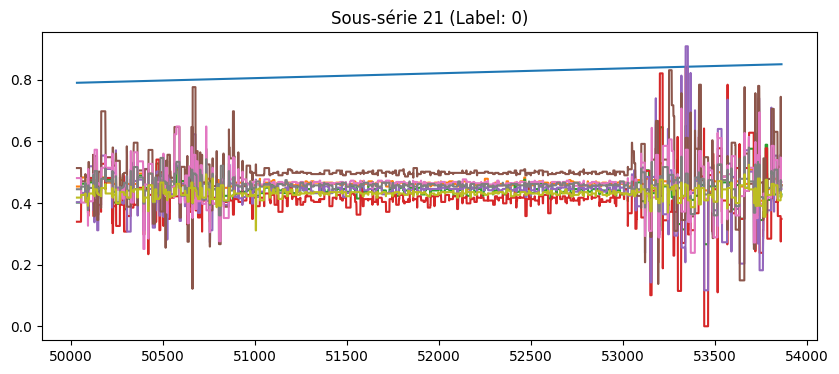

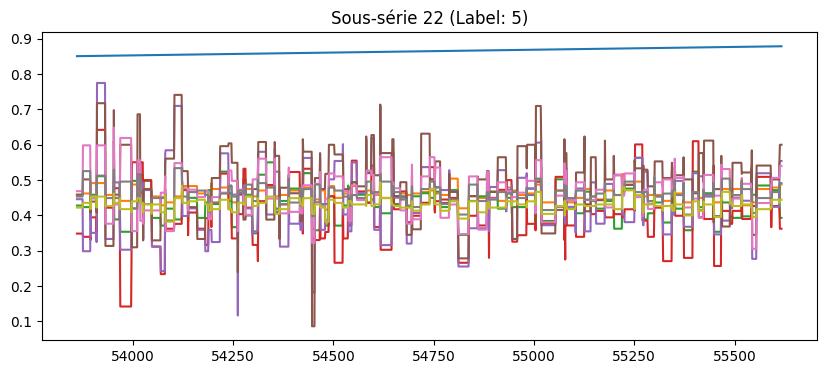

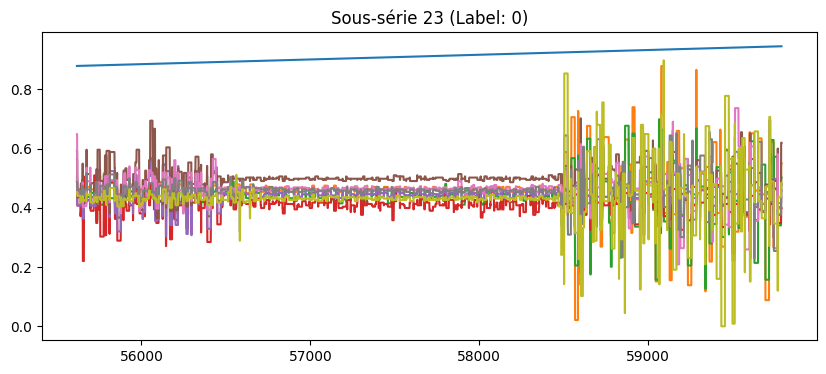

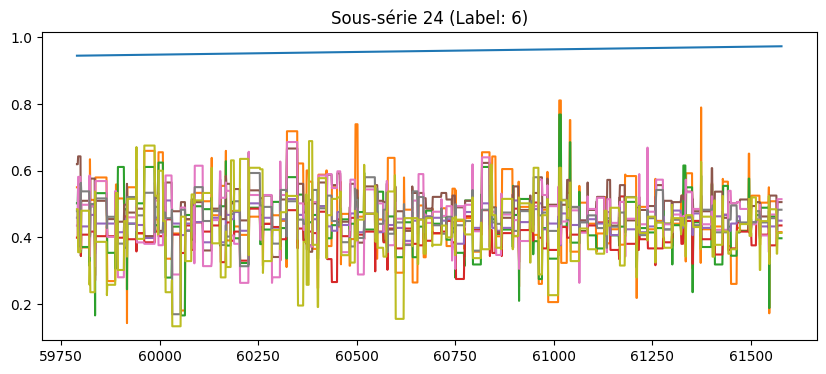

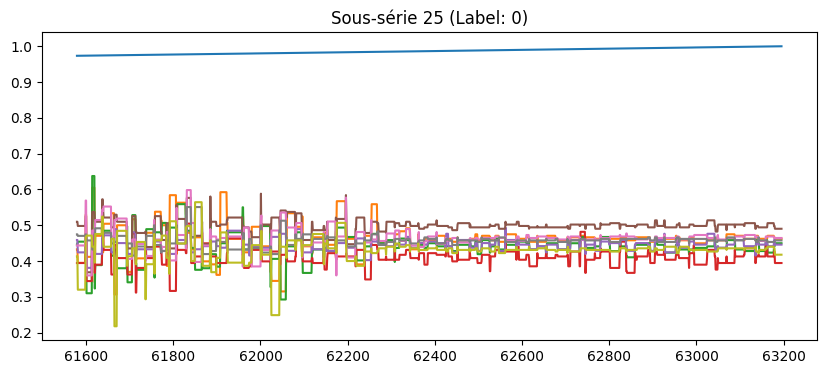

In [ ]:
# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

# Visualiser les sous-séries normalisées
for i, sub in enumerate(normalized_sub_series):
    plt.figure(figsize=(10, 4))
    plt.plot(sub[numeric_columns])
    plt.title(f"Sous-série {i + 1} (Label: {sub['class'].iloc[0]})")
    plt.show()

Les graphes de chaque sous série normalisé sont différents, par exemple:  

**Sous-série 9 (Label: 0)** : On observe une tendance générale relativement stable, avec des fluctuations fréquentes et importantes. La normalisation des données permet de mieux visualiser ces variations.

**Sous-série 10 (Label: 5)** : Cette sous-série présente un comportement plus régulier et oscillant autour de la valeur moyenne. L'absence de tendance évidente pourrait signifier un comportement relativement stationnaire des données.

**Sous-série 11 (Label: 0)** : Ici aussi, les données montrent une oscillation autour de la moyenne. On remarque une instabilité plus marquée que dans la sous-série 10, avec des variations plus accentuées dans certaines périodes.

**Sous-série 14 (Label: 1)** : Contrairement aux autres sous-séries, celle-ci semble comporter une tendance légère à la hausse, ce qui pourrait indiquer un changement progressif au fil du temps. Les données fluctuent autour de cette tendance, avec des pics et des creux marqués

## **3. Utiliser la TDA pour créer un modèle de classification. Que peut on dire?**

Installation des bibliothèques Python

In [ ]:
!pip install gudhi
#!pip install --upgrade gudhi
!pip install giotto-tda
!pip install giotto-tda scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.6/460.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


 Importation des bibliothèques nécessaires pour effectuer une analyse de données

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude

Notre objectif principal est de transformer des séries temporelles en caractéristiques numériques exploitables par des algorithmes de machine learning


Pour avoir un temps d'exécution un peu plus rapide on décide d'exécuter cette partie de code

Extraction des **caractéristiques topologiques**. *Temps d'exécution : 28 min*

In [ ]:
############# Pour avoir un temps d'exécution plus rapide#####
from sklearn.metrics import accuracy_score, pairwise_distances
# Sous-échantillonnage des séries temporelles
time_series_data = [sub[numeric_columns].values[::2] for sub in normalized_sub_series]
# Convertir les sous-séries en un format adapté à la TDA
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]
# Pré-calcul des matrices de distance
distance_matrices = [pairwise_distances(series) for series in time_series_data]

# Calcul des diagrammes de persistance avec parallélisation et optimisation
persistence = VietorisRipsPersistence(
    homology_dimensions=[0, 1],
    max_edge_length=1,
    collapse_edges=True,
    n_jobs=-1
)

diagrams = persistence.fit_transform(distance_matrices)
####################################################

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

/usr/local/lib/python3.11/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning: All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.
  check_point_clouds(X, accept_sparse=True,
/usr/local/lib/python3.11/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning: All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.
  X = check_point_clouds(X, accept_sparse=True,


Entraînement d'un modèle de **classification:** étant donné que nous avons une tâche de classification à 6 classes, il semble judicieux d'utiliser le **random forest.** Il est aussi intéressant pour sa capacité  à gérer efficacement des caractéristiques complexes et haute-dimensionnelles.

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.40


Ou bien on peut exécuter cette partie. On reprend quasiment le même code que prédement. Mais au final on obtient la même accuracy.

In [ ]:
############## Pour avoir un temps d'exécution plus rapide#####
# from sklearn.metrics import accuracy_score, pairwise_distances
# # Sous-échantillonnage des séries temporelles
# time_series_data = [sub[numeric_columns].values[::2] for sub in normalized_sub_series]

# # Pré-calcul des matrices de distance
# distance_matrices = [pairwise_distances(series) for series in time_series_data]

# # Calcul des diagrammes de persistance avec parallélisation et optimisation
# persistence = VietorisRipsPersistence(
#     homology_dimensions=[0, 1],
#     max_edge_length=0.5,
#     collapse_edges=True,
#     n_jobs=-1
# )
# diagrams = persistence.fit_transform(distance_matrices)
######################################################

# Convertir les sous-séries en un format adapté à la TDA
time_series_data = [sub[numeric_columns].values for sub in normalized_sub_series]
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]

# Calculer les diagrammes de persistance
homology_dimensions = [0, 1]  # Dimensions d'homologie à calculer (0 pour les composantes connexes, 1 pour les cycles)
persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
diagrams = persistence.fit_transform(time_series_data)

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

Entraînement d'un modèle de **classification**

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.40



*   L'évaluation de notre modèle donne une **précision globale de 40%**, ce
 qui suggère que le modèle a du mal à distinguer les classes.
*   Le jeu de données est déséquilibré : certaines classes ont très peu d'exemples **(classes 2, 5)**, ce qui rend difficile l'apprentissage de ces classes pour le modèle.
*   Le modèle a tendance à privilégier la classe 0 (majoritaire dans le jeu de test).
*   Avec seulement **17 séries** pour l'entraînement et **8 séries** pour le test, le jeu de données est peut-être très petit, ce qui limite la capacité du modèle à généraliser.



---



## **4. Faire de même en enlevant les classes 0. Que peut on dire?**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, Amplitude
import numpy as np

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

On enlève la **classe 0**

In [ ]:
# Filtrer les sous-séries pour supprimer la classe 0
filtered_sub_series = [sub for sub in sub_series if sub['class'].iloc[0] != 0]


In [ ]:
# Vérifier que chaque sous-série a un label unique
for sub in filtered_sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries filtrées
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []


# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in filtered_sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

In [ ]:
# Convertir les sous-séries en un format adapté à la TDA
time_series_data = [sub[numeric_columns].values for sub in normalized_sub_series]
labels = [sub['class'].iloc[0] for sub in normalized_sub_series]

# Calculer les diagrammes de persistance
homology_dimensions = [0, 1]  # Dimensions d'homologie à calculer (0 pour les composantes connexes, 1 pour les cycles)
persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
diagrams = persistence.fit_transform(time_series_data)

# Extraire des caractéristiques à partir des diagrammes de persistance
entropy = PersistenceEntropy()
amplitude = Amplitude(metric='wasserstein')

X_entropy = entropy.fit_transform(diagrams)
X_amplitude = amplitude.fit_transform(diagrams)

# Combiner les caractéristiques
X = np.hstack([X_entropy, X_amplitude])
y = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classifieur (par exemple, une forêt aléatoire)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


😡 Même en supprimant la classe 0 on ne s'en sors pas mieux!!!!! D'ailleurs on a même  un moin bon score que précedement. Je pense qu'on devrait essayer **d'augmenter la taille** du jeu de données, et peut-être également **filtrer ou lisser** les séries temporelles pour réduire le bruit.

##  **5. Créer le complexe simplicial sur les séries temporelles de la question 2. Pouvait on deviner la différence entre les questions 3 et 4 en regardant la persistance de ce complexe?**  

Pour cette partie on aura deux approches, la première qui sera de considérer tout l'ensemble du jeu de donnée (section 5.1, 5.2, 5.3 et 5.4) et la deuxième partie qui sera de considérer uniquement un échantillon (section 5.5)

### **5.1 Persistance**

Calcul et visualisation de la **persistance** pour chaque sous-série

In [2]:
!pip uninstall -y gudhi
!pip install gudhi
!pip install persim
!pip install ripser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=ca4fa65bcd9740b3500968c9fbe2eb3a45a0855393f9a035d4ac0161c3a32053
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 9.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import pandas as pd
import gc
from persim import PersistenceImager  # Utiliser PersistenceImager au lieu de PersImage

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

# Vérifier que chaque sous-série a un label unique
for sub in sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."


Nous faisons une **normalisation globale** car nous souhaitons comparer les diagrammes de persistance entre différentes sous-séries de manière cohérente

In [ ]:
# Normalisation des sous-séries
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []

# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

**Diagramme de persitance avec Ripser** *Temps d'exécution trop long (1 h)*

In [ ]:
from ripser import Rips
import matplotlib.pyplot as plt

# Calcul des diagrammes de persistance avec Ripser
rips = Rips()
diagrams = [rips.fit_transform(sub.select_dtypes(include=['float64', 'int64']).values) for sub in normalized_sub_series]


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


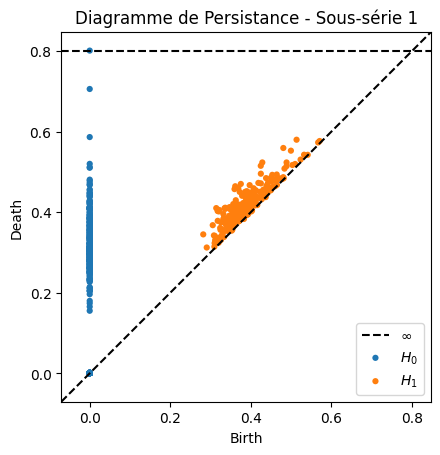

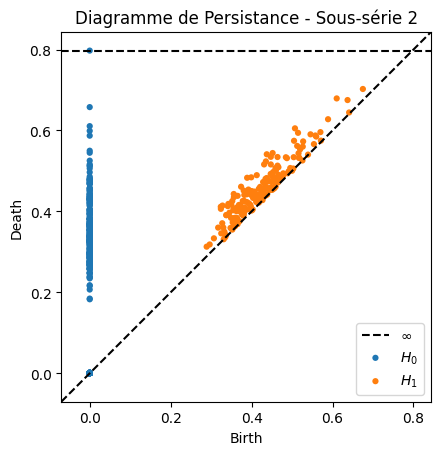

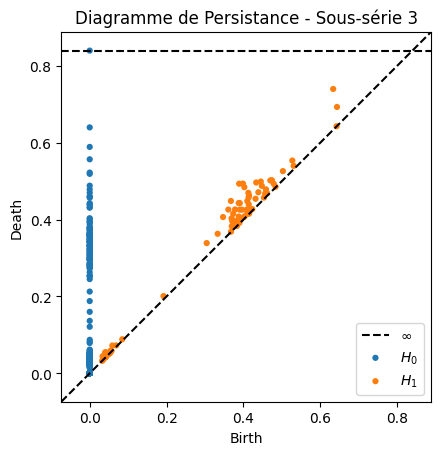

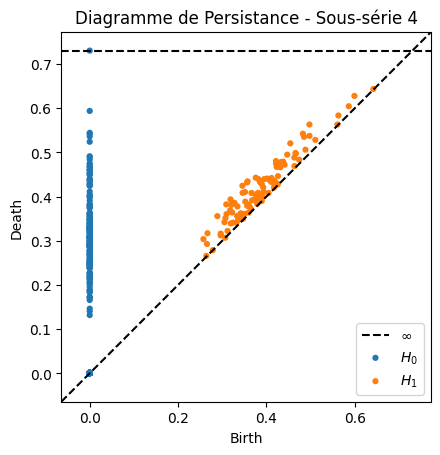

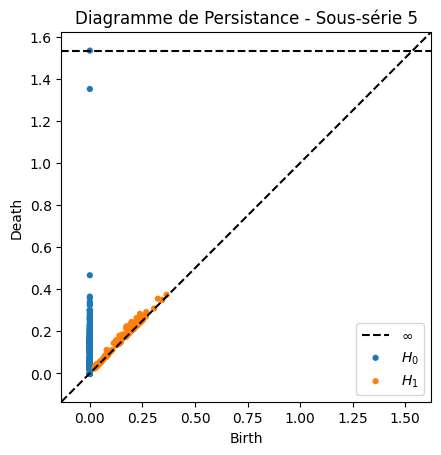

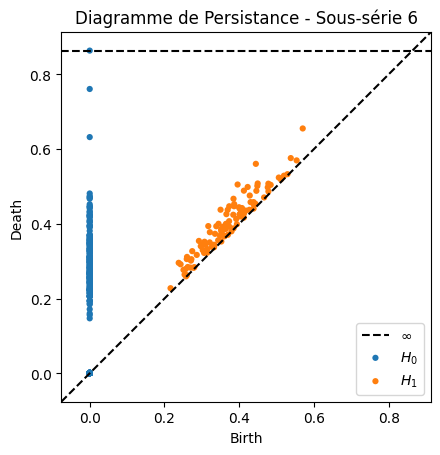

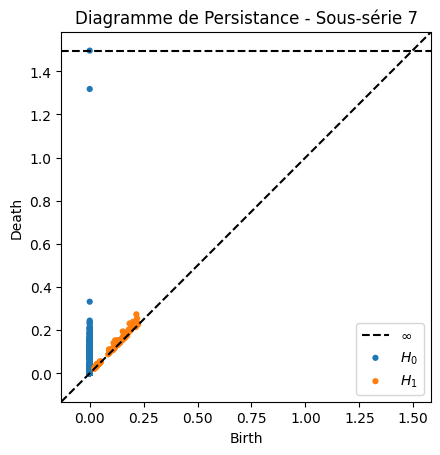

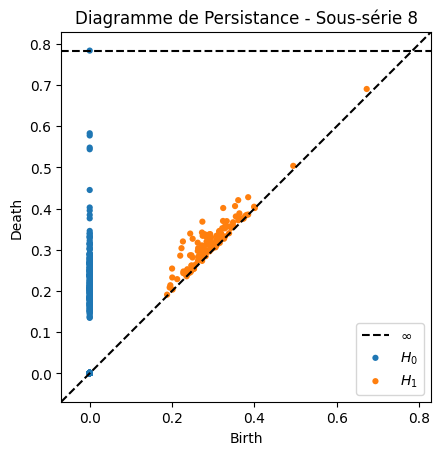

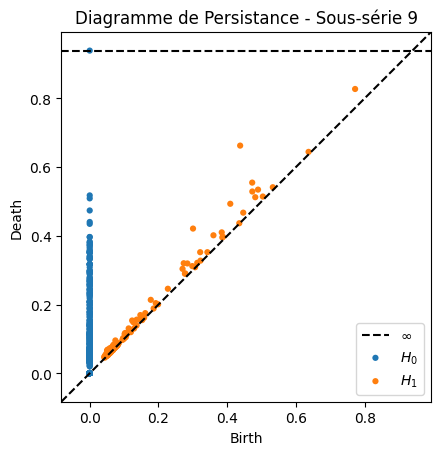

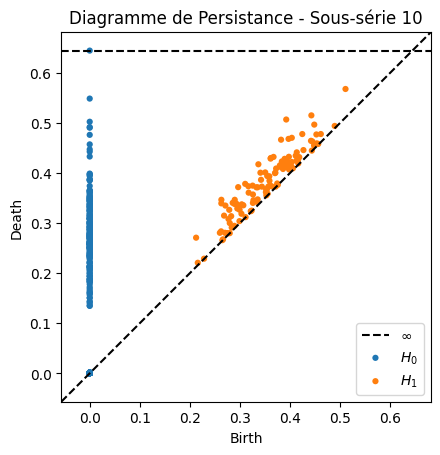

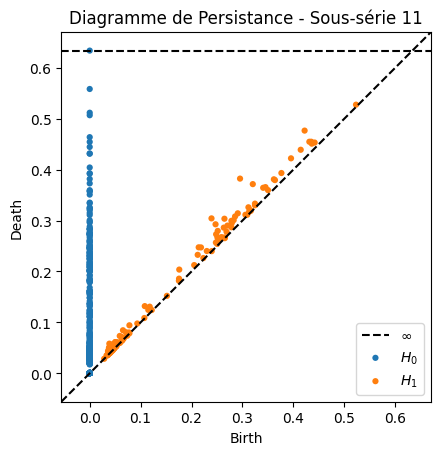

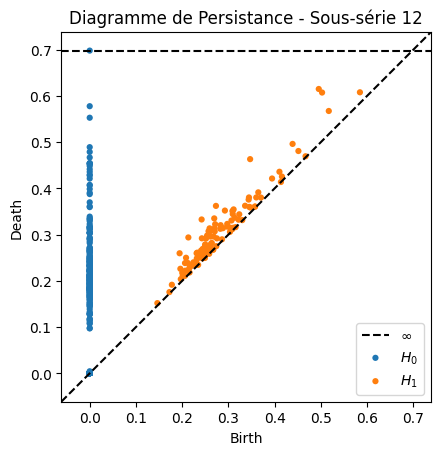

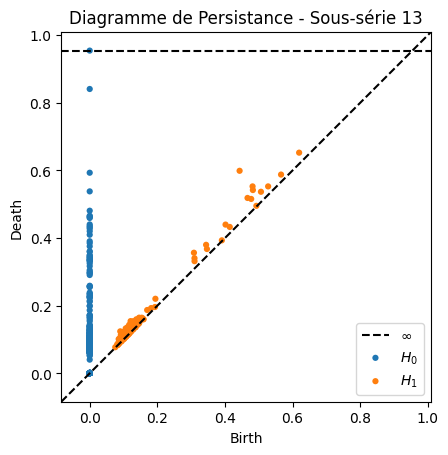

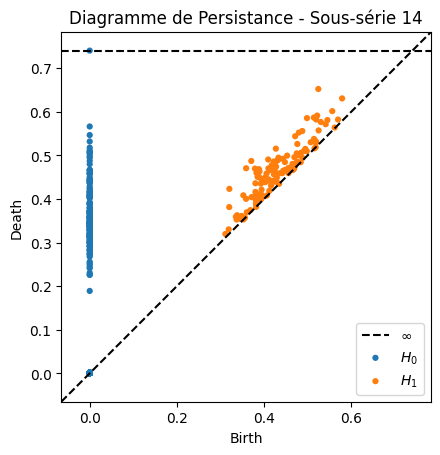

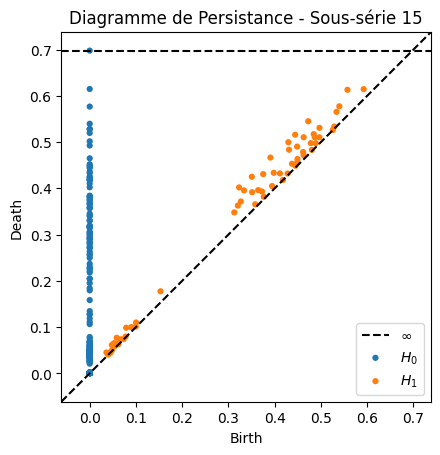

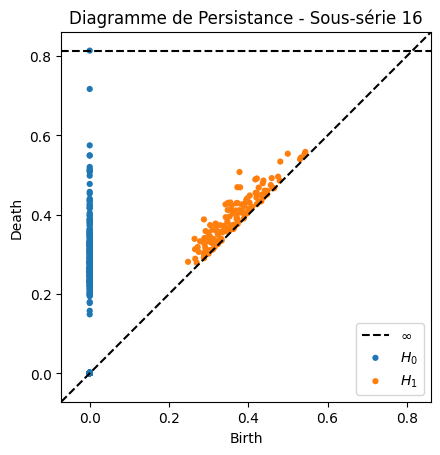

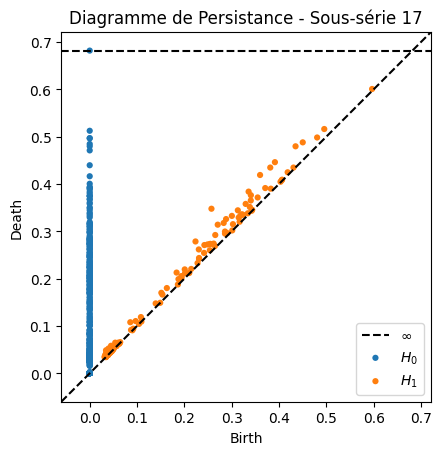

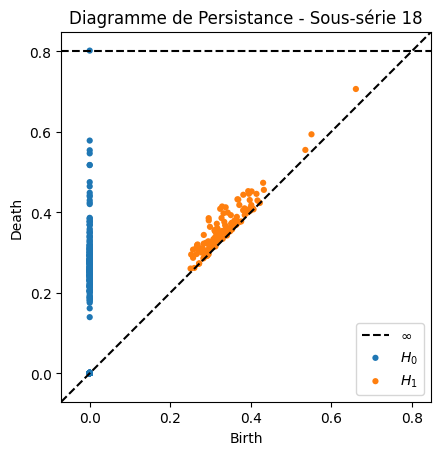

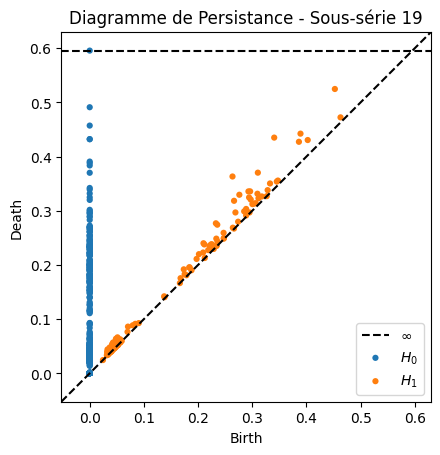

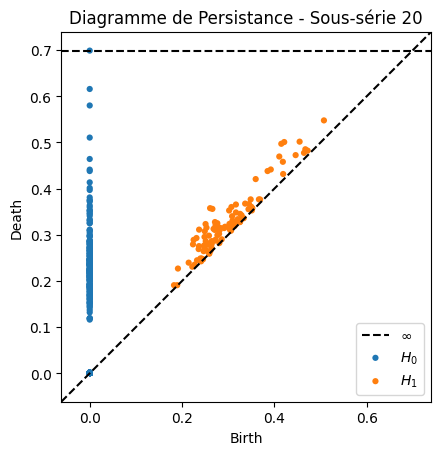

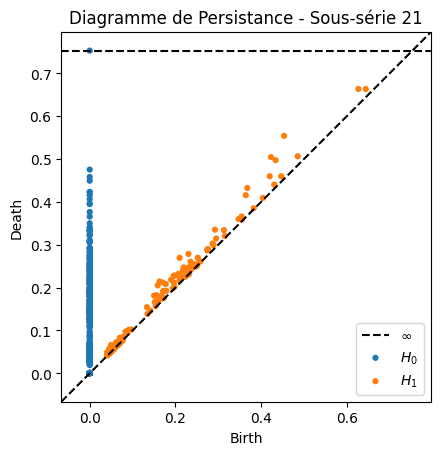

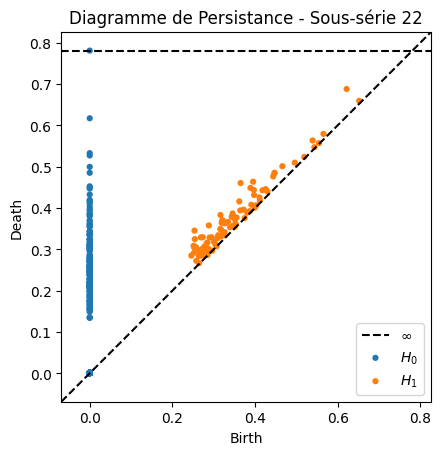

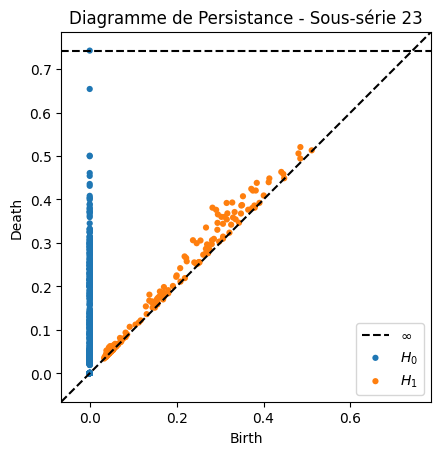

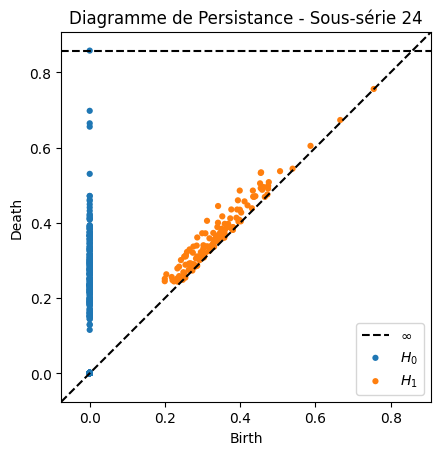

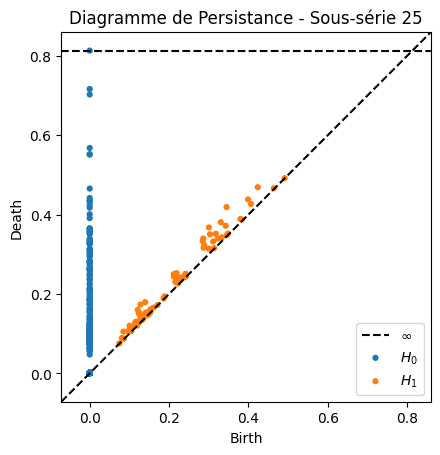

In [ ]:
for i, dgms in enumerate(diagrams):
    rips.plot(dgms, show=False)
    plt.title(f"Diagramme de Persistance - Sous-série {i + 1}")
    plt.show()

### **5.1.1 Pouvait on déviner la différence entre les questions 3 et 4 en regardant la persistance de ce complexe ?**

**Conclusion:** Les diagrammes de persistance de la classe 0 (sous-série 1, 3, 5, 7, 9, 11 ) montrent un **forte variabilité intra-classe.** Donc en termes de structure topologique on peut dire que la classe 0 varie trop et c'est normale qu'elle ne puisse pas faciliter la classification. Cependant, je me demande pourquoi lorsque j'ai enlever la classe 0, je n'ai pas eu une amélioration de mon accuracy. Je m'attendais à avoir un modèle performant mieux sans la classe 0.

Lorsque l'on regarde la **persistence des features**, on a beaucoup trop de points proches de la diagonale pour la plupart de nos sous-séries. Les points proches de la diagonale révèlent une **absence de structure topologique robuste**, rendant les classes difficilement séparables.



🏆 **Je peux repondre oui que entre les questions 3 et 4  en ayant préalablement regarder la persistance on se serait attendu à une meilleure perfomance du modèle sans la classe 0** !!!!

### **5.2 Diagrammes des paysages ou landscape**

J'ai pu prendre le `max_edge_length = 3` ici  et ça marche sans faire planter la session.

Traitement de la sous-série 1...
Traitement de la sous-série 2...
Traitement de la sous-série 3...
Traitement de la sous-série 4...
Traitement de la sous-série 5...
Traitement de la sous-série 6...
Traitement de la sous-série 7...
Traitement de la sous-série 8...
Traitement de la sous-série 9...
Traitement de la sous-série 10...
Traitement de la sous-série 11...
Traitement de la sous-série 12...
Traitement de la sous-série 13...
Traitement de la sous-série 14...
Traitement de la sous-série 15...
Traitement de la sous-série 16...
Traitement de la sous-série 17...
Traitement de la sous-série 18...
Traitement de la sous-série 19...
Traitement de la sous-série 20...
Traitement de la sous-série 21...
Traitement de la sous-série 22...
Traitement de la sous-série 23...
Traitement de la sous-série 24...
Traitement de la sous-série 25...


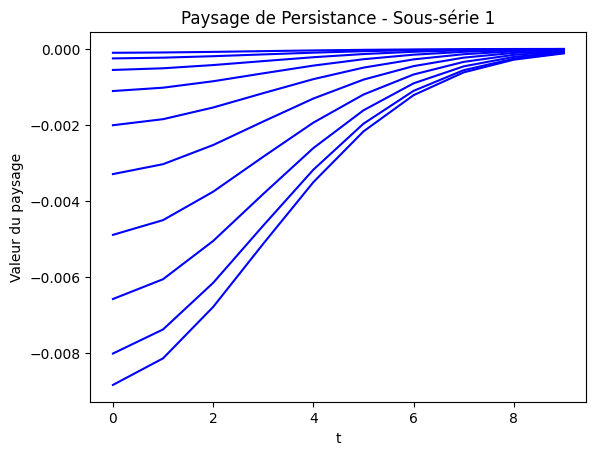

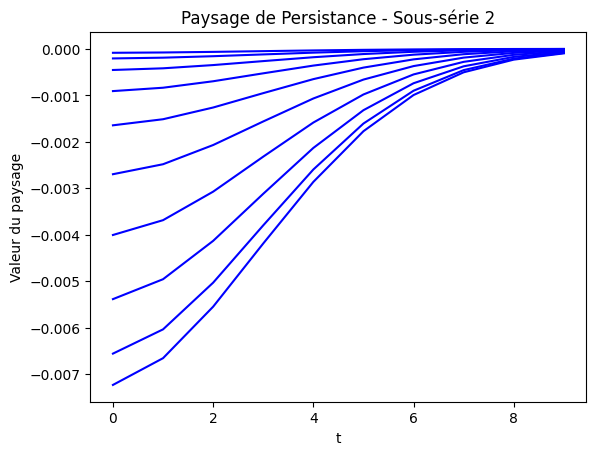

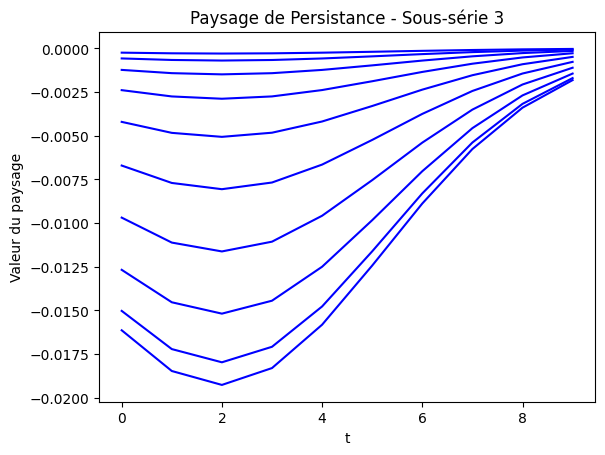

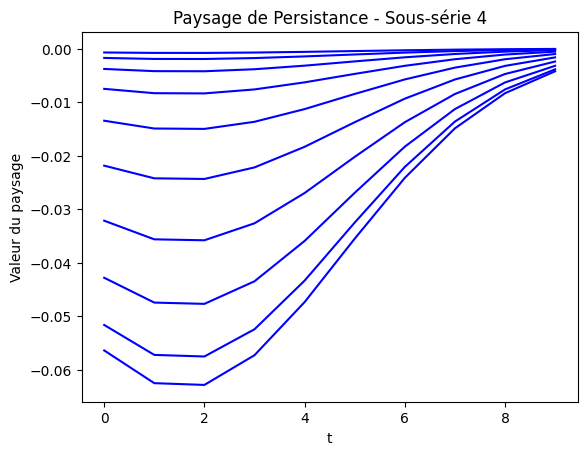

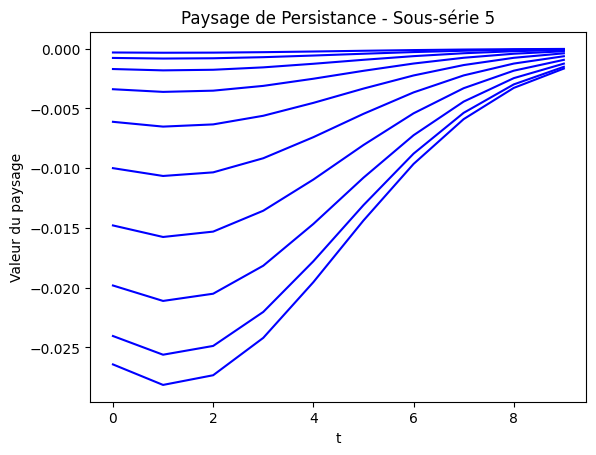

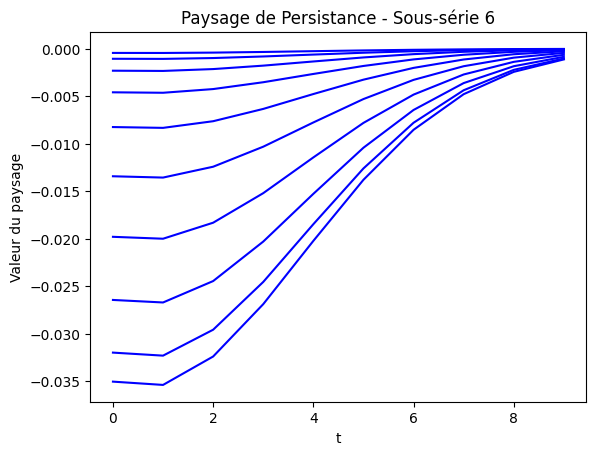

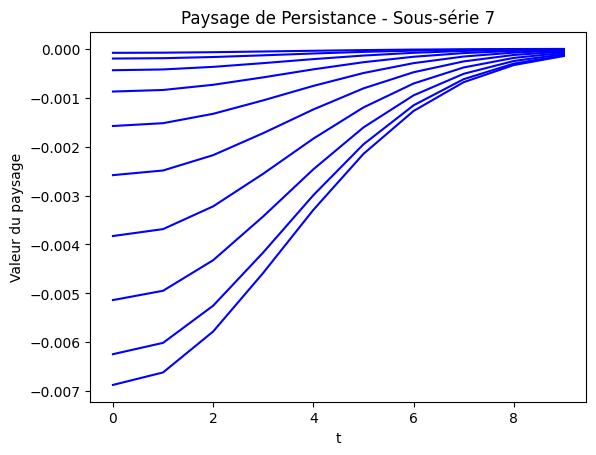

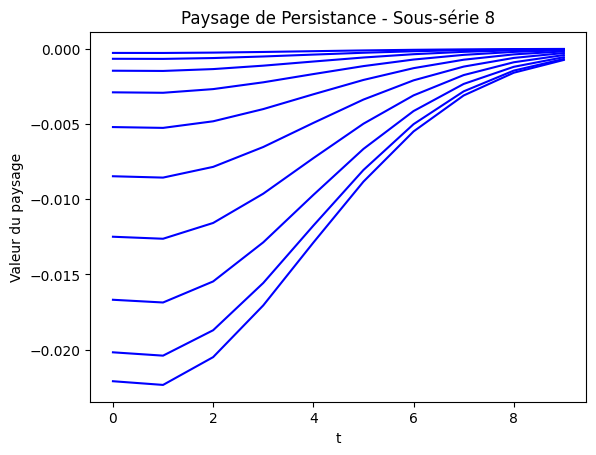

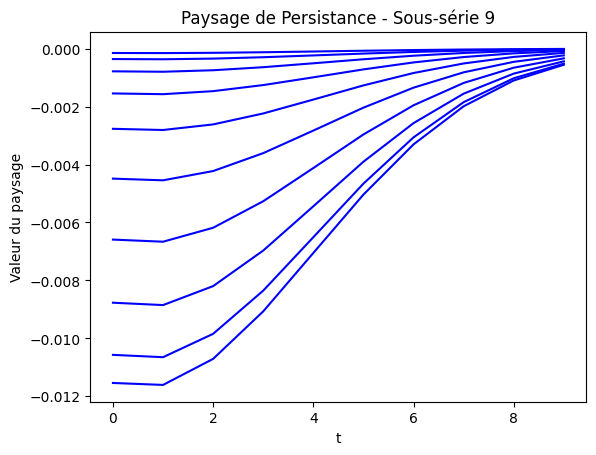

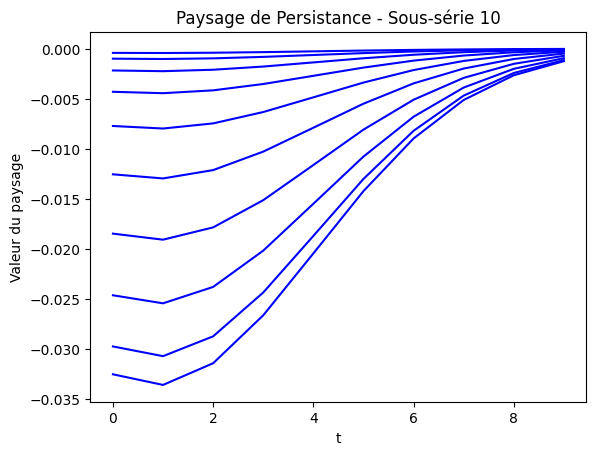

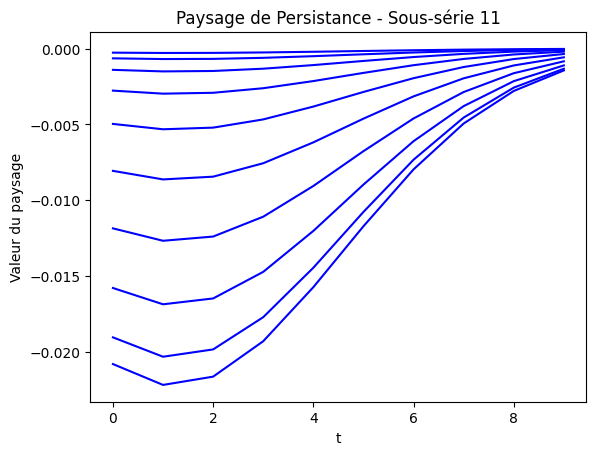

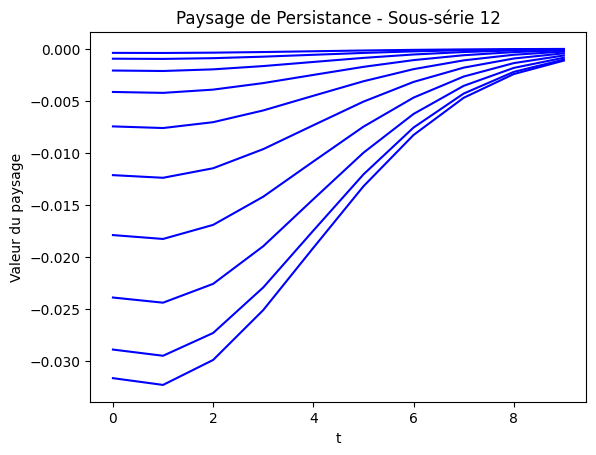

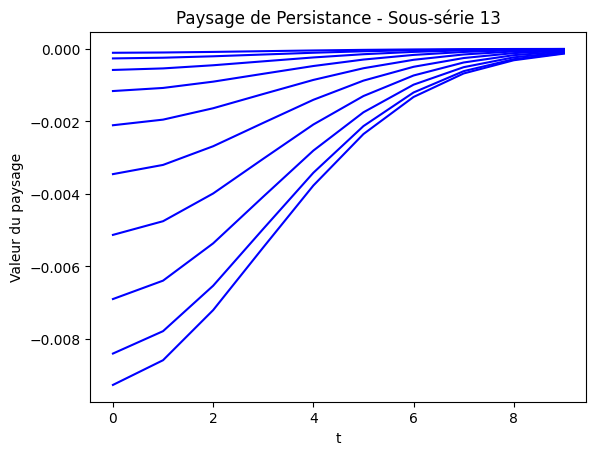

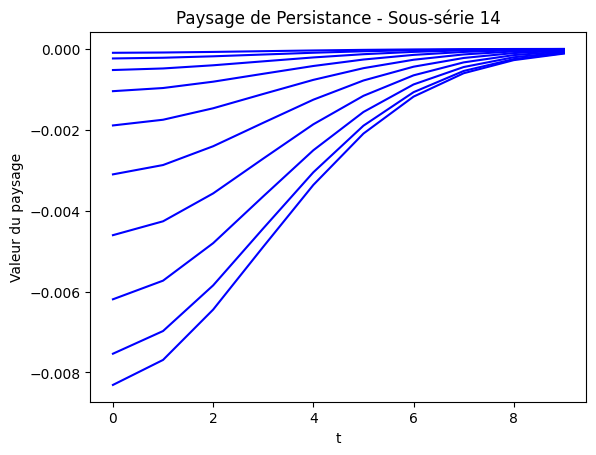

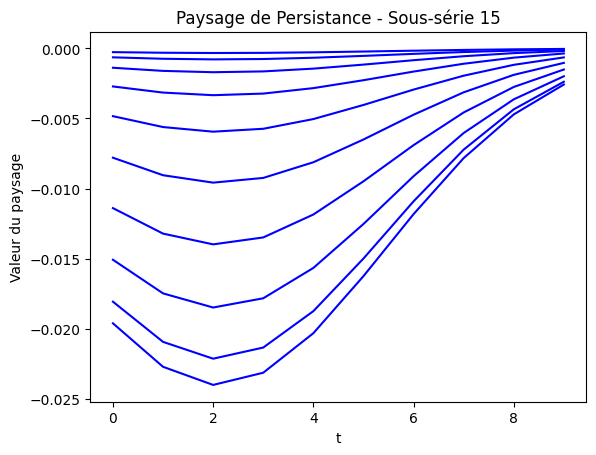

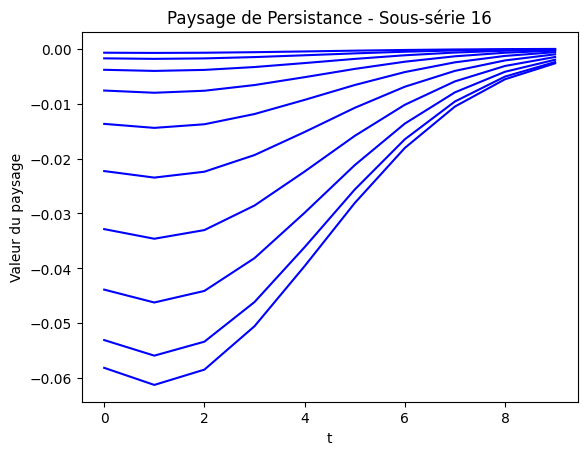

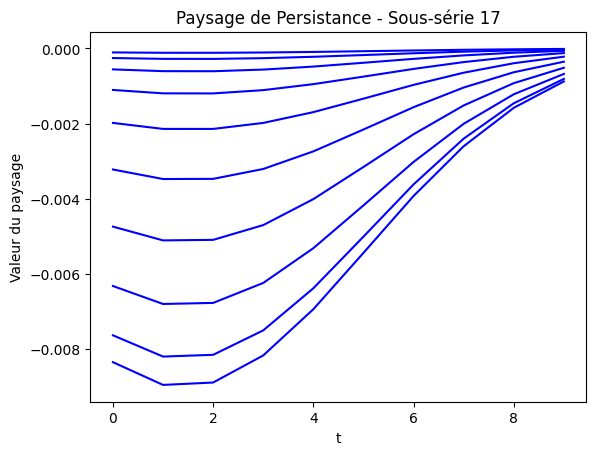

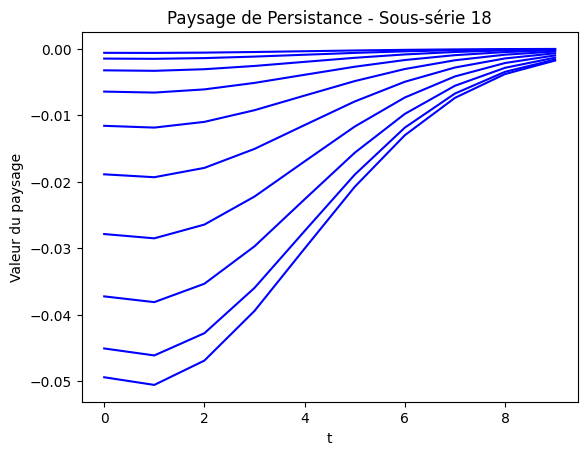

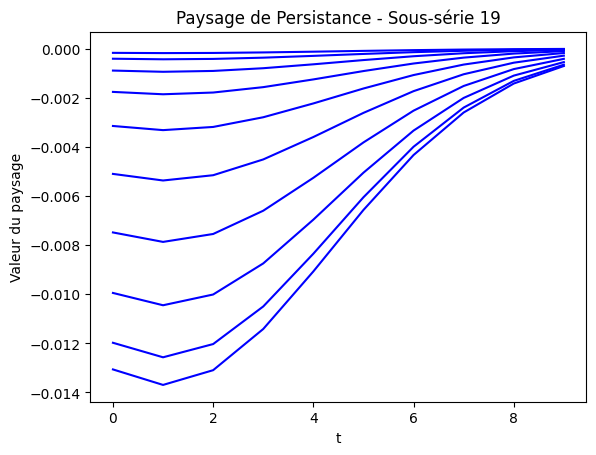

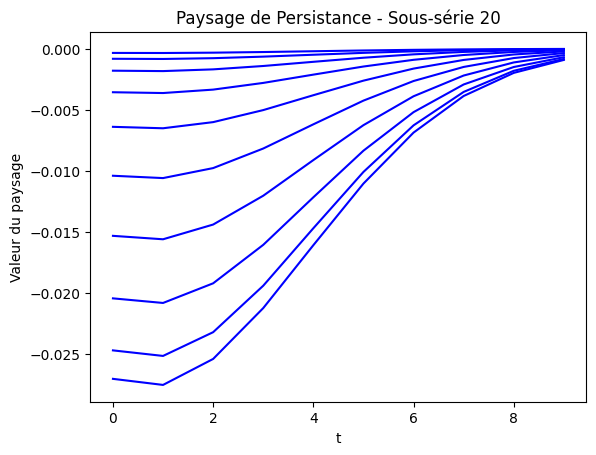

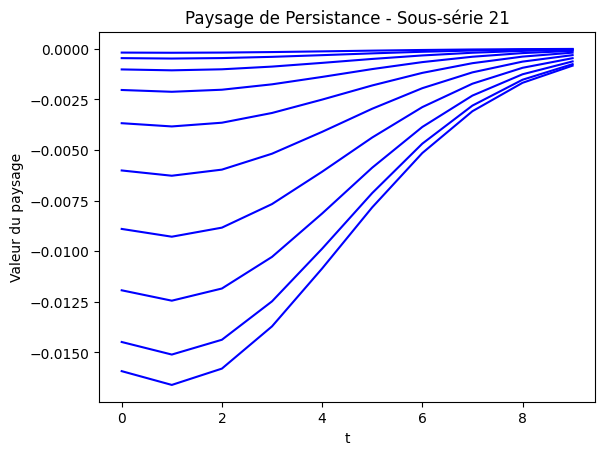

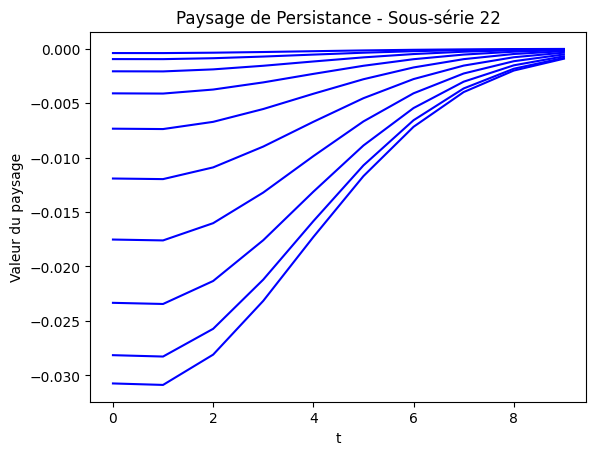

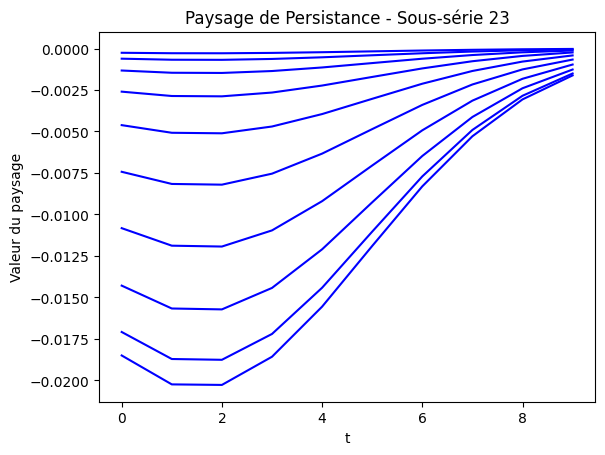

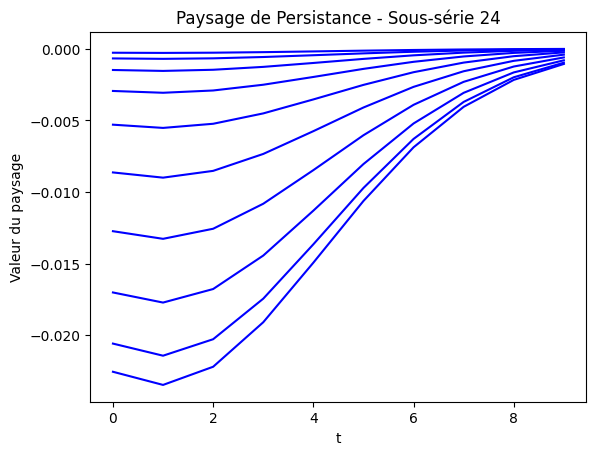

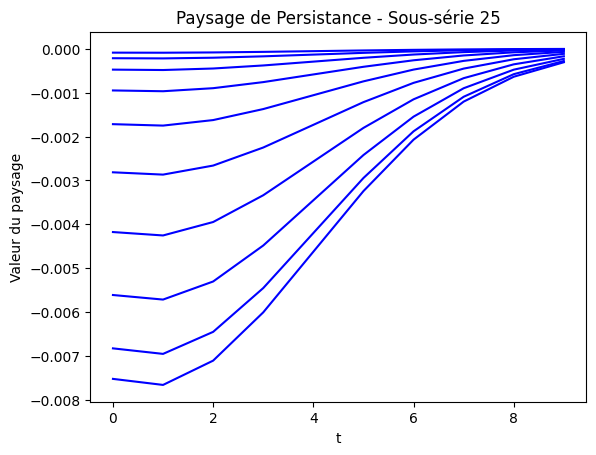

In [ ]:
# Calcul des diagrammes de persistance et des paysages pour chaque sous-série
landscapes = []
for i, sub in enumerate(normalized_sub_series):
    print(f"Traitement de la sous-série {i + 1}...")  # Message de débogage

    # Extraire les points du nuage
    point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

    # Sous-échantillonnage des points du nuage
    point_cloud_sampled = resample(point_cloud, n_samples=100, random_state=42)

    # Créer un complexe de Rips avec une longueur maximale d'arête réduite
    rips_complex = gd.RipsComplex(points=point_cloud_sampled, max_edge_length=3)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Calculer le diagramme de persistance pour l'homologie H1
    diagram = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
    persistence_intervals = simplex_tree.persistence_intervals_in_dimension(1)

    if not persistence_intervals.any():  # Utiliser .any() pour vérifier si le tableau est vide
        print(f"Aucun diagramme pour la sous-série {i + 1}.")
        continue

    # Créer un paysage de persistance avec `persim`
    pim = PersistenceImager(
        pixel_size=0.1,  # Taille des pixels
        weight=lambda b, d, **kwargs: d - b,  # Fonction de pondération (accepte naissance et mort)
        kernel_params={"sigma": 0.1}  # Paramètres du noyau gaussien
    )
    L = pim.transform([persistence_intervals])
    landscapes.append(L)

    # Libérer la mémoire inutile
    del rips_complex, simplex_tree, diagram, persistence_intervals, pim, L
    gc.collect()

# Afficher les paysages de persistance
for i, landscape in enumerate(landscapes):
    plt.plot(landscape[0], color='blue')  # Affiche le premier paysage
    plt.title(f"Paysage de Persistance - Sous-série {i + 1}")
    plt.xlabel("t")
    plt.ylabel("Valeur du paysage")
    plt.show()

Les paysages de persistance transforment les diagrammes de persistance en **fonctions vectorielles**, permettant une analyse quantitative.

On observe comme précedemment que les paysage de persistance de la classe 0 (sous-série 1, 3, 5, 7, 9, 11, 13) montrent un forte variabilité intra-classe. On a par exemple la sous-série 7 avec une **amplitude des pics** de -0.007 tandis que la  sous-série 13 à -0.012.

Les pics prononcés à des positions distinctes dans les paysages de persistance révèlent des **structures topologiques discriminantes entre les classes.**

### **5.3 Courbe de Betti**

Calcul des courbes de Betti pour la sous-série 1...
Calcul des courbes de Betti pour la sous-série 2...
Calcul des courbes de Betti pour la sous-série 3...
Calcul des courbes de Betti pour la sous-série 4...
Calcul des courbes de Betti pour la sous-série 5...
Calcul des courbes de Betti pour la sous-série 6...
Calcul des courbes de Betti pour la sous-série 7...
Calcul des courbes de Betti pour la sous-série 8...
Calcul des courbes de Betti pour la sous-série 9...
Calcul des courbes de Betti pour la sous-série 10...
Calcul des courbes de Betti pour la sous-série 11...
Calcul des courbes de Betti pour la sous-série 12...
Calcul des courbes de Betti pour la sous-série 13...
Calcul des courbes de Betti pour la sous-série 14...
Calcul des courbes de Betti pour la sous-série 15...
Calcul des courbes de Betti pour la sous-série 16...
Calcul des courbes de Betti pour la sous-série 17...
Calcul des courbes de Betti pour la sous-série 18...
Calcul des courbes de Betti pour la sous-série 19...
Ca

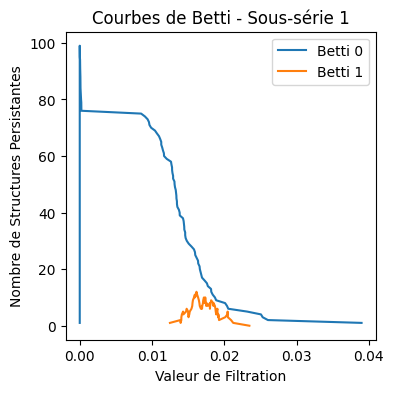

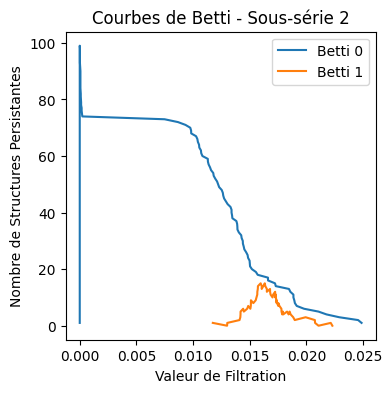

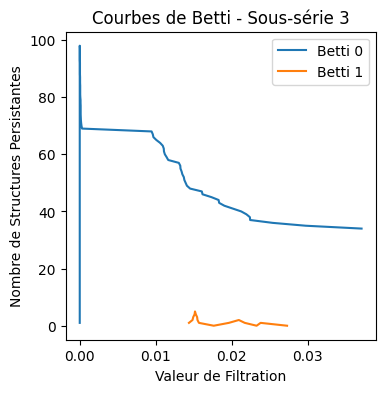

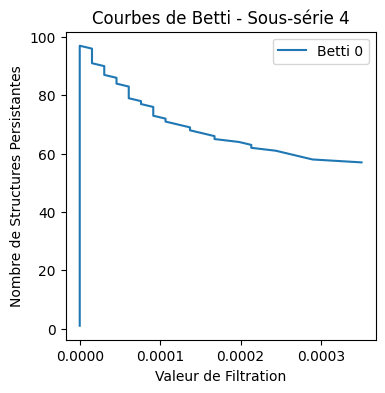

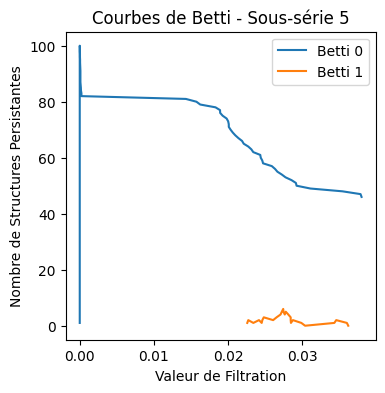

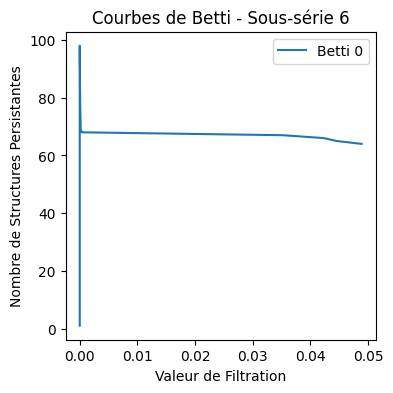

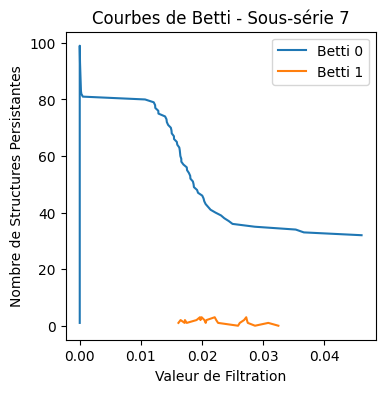

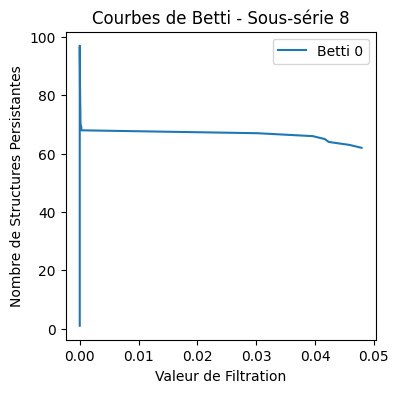

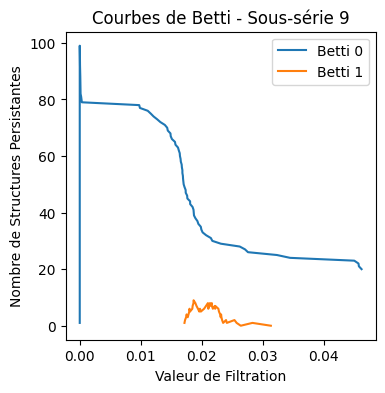

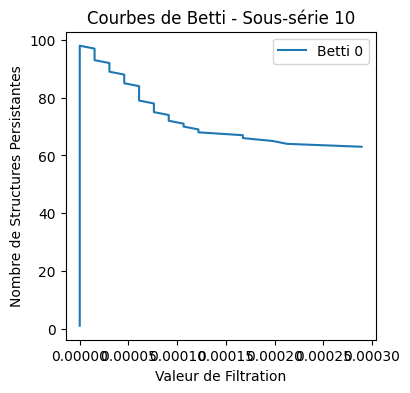

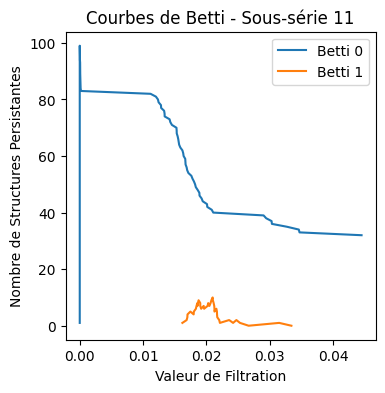

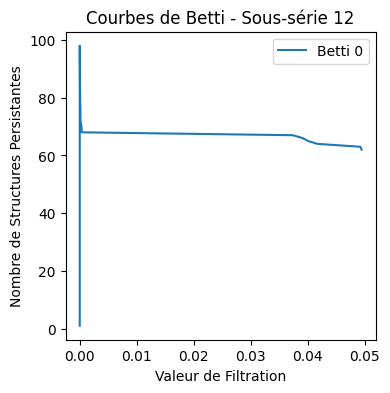

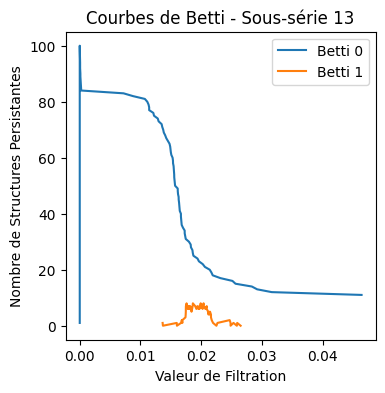

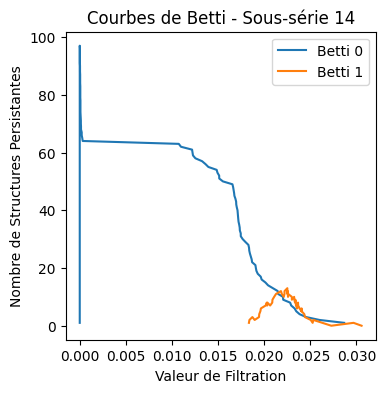

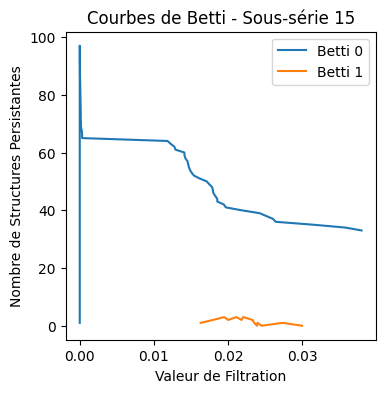

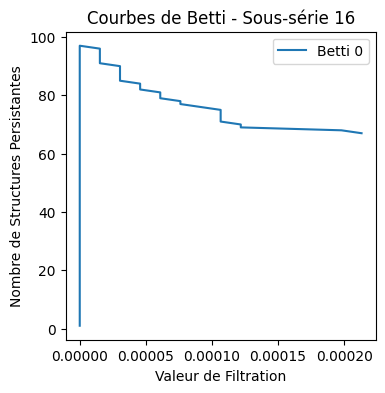

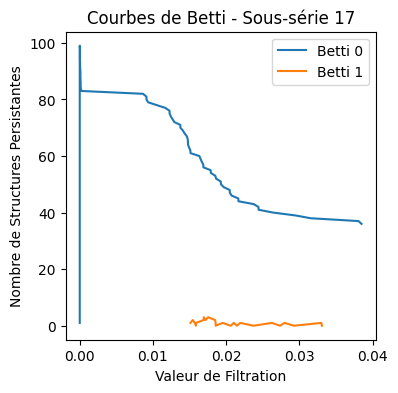

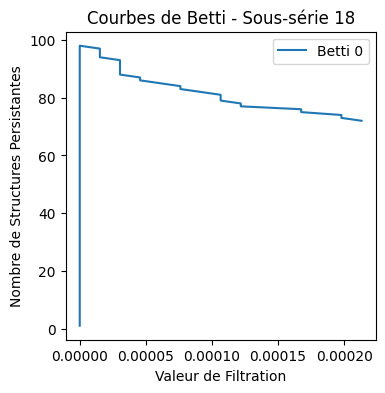

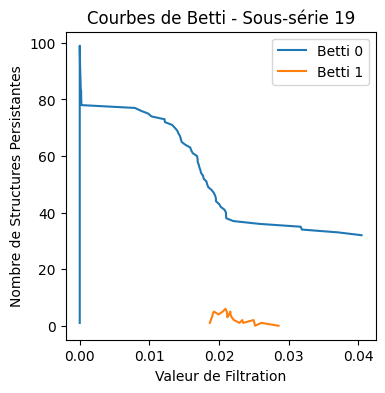

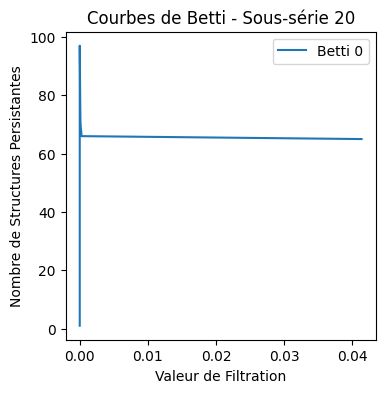

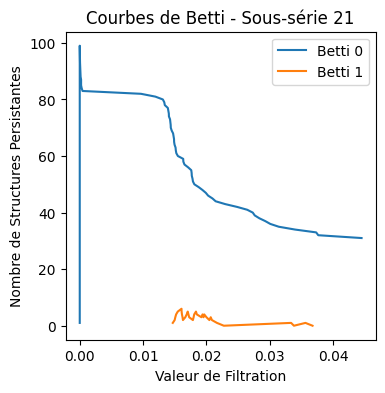

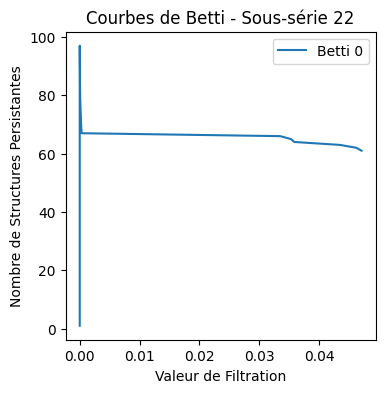

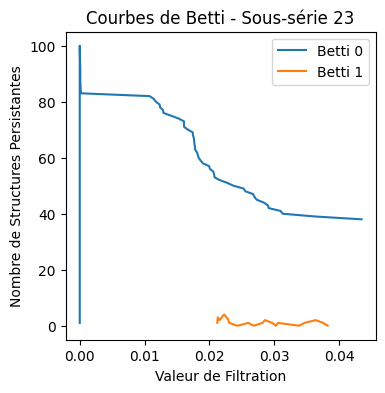

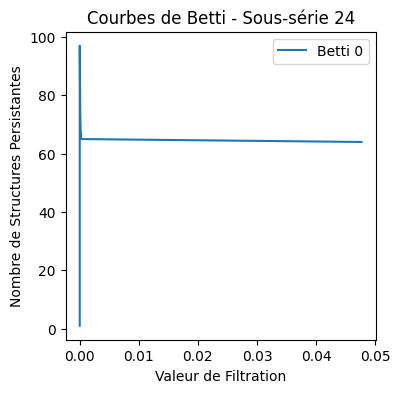

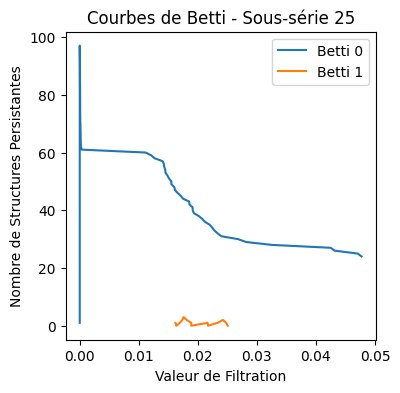

In [ ]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import pandas as pd
import gc
from persim import PersistenceImager

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Découper la série en sous-séries avec labels uniques
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

# Vérifier que chaque sous-série a un label unique
for sub in sub_series:
    assert sub['class'].nunique() == 1, "Une sous-série contient plusieurs labels."

# Normalisation des sous-séries
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('class')
normalized_sub_series = []

# Appliquer la normalisation
scaler.fit(data[numeric_columns])  # Normalisation globale
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

from collections import defaultdict

# Fonction pour calculer les courbes de Betti
def compute_betti_curves(diagram):
    betti_curves = defaultdict(list)

    for dim, intervals in enumerate(diagram):
        for birth, death in intervals:
            betti_curves[dim].append((birth, 1))  # Naissance d'une structure
            if death != float('inf'):
                betti_curves[dim].append((death, -1))  # Mort d'une structure

    for dim in betti_curves:
        betti_curves[dim].sort()
        current_count = 0
        filtered_counts = []

        for value, change in betti_curves[dim]:
            current_count += change
            filtered_counts.append((value, current_count))

        betti_curves[dim] = filtered_counts

    return betti_curves

# Calcul des courbes de Betti pour chaque sous-série
betti_curves_list = []
for i, sub in enumerate(normalized_sub_series):
    print(f"Calcul des courbes de Betti pour la sous-série {i + 1}...")  # Message de débogage

    # Extraire les points du nuage
    point_cloud = sub.select_dtypes(include=['float64', 'int64']).values

    # Sous-échantillonnage des points du nuage
    point_cloud_sampled = resample(point_cloud, n_samples=100, random_state=42)

    # Créer un complexe de Rips avec une longueur maximale d'arête réduite
    rips_complex = gd.RipsComplex(points=point_cloud_sampled, max_edge_length=0.05)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Calculer le diagramme de persistance pour toutes les dimensions homologiques
    diagram = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
    persistence_intervals = [simplex_tree.persistence_intervals_in_dimension(dim) for dim in range(3)]

    # Calcul des courbes de Betti
    betti_curves = compute_betti_curves(persistence_intervals)
    betti_curves_list.append(betti_curves)

    # Libérer la mémoire inutile
    del rips_complex, simplex_tree, diagram, persistence_intervals
    gc.collect()

# Afficher les courbes de Betti
for i, betti_curves in enumerate(betti_curves_list):
    plt.figure(figsize=(4, 4))

    for dim, curve in betti_curves.items():
        x, y = zip(*curve)
        plt.plot(x, y, label=f'Betti {dim}')

    plt.title(f'Courbes de Betti - Sous-série {i + 1}')
    plt.xlabel('Valeur de Filtration')
    plt.ylabel('Nombre de Structures Persistantes')
    plt.legend()
    plt.show()



---



### **5.4 Complexe simplicial :**

 Des graphes Mapper permettant d'explorer les relations topologiques entre les points et de visualiser les `classes` seront générés.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from gtda.mapper import make_mapper_pipeline, CubicalCover, plot_static_mapper_graph
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Charger les données
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

# Identifier où les changements de label se produisent
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

# Créer les sous-séries
sub_series = []
for i in range(len(change_indices) - 1):
    sub_series.append(data.iloc[change_indices[i]:change_indices[i + 1]])

Je normalise les données **sans enlever** la colonne `class`

In [ ]:
# Normalisation par sous-série
normalized_sub_series = []
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

On fait un **normalisation globale**

In [ ]:
# Normalisation globale
scaler.fit(data[numeric_columns])
for sub in sub_series:
    sub_scaled = sub.copy()
    sub_scaled[numeric_columns] = scaler.transform(sub[numeric_columns])
    normalized_sub_series.append(sub_scaled)

On enlève la colonne `class` à chaque sous-série avant de construire le **complexe simplicial**

In [ ]:
#normalized_sub_series = [sub.drop(columns=['class']) for sub in normalized_sub_series]

On utilise une **projection PCA** comme fonction de filtrage.

In [ ]:
# Configuration de la pipeline Mapper
n_intervals = 10
overlap = 0.3
epsilon = 0.1
filter_func = PCA(n_components=2)  # Utilisation de PCA comme fonction de filtrage

pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=CubicalCover(n_intervals=n_intervals, overlap_frac=overlap),
    clusterer=DBSCAN(eps=epsilon),
    n_jobs=1
)


In [ ]:
# Appliquer la pipeline Mapper à chaque sous-série normalisée
for i, sub_data in enumerate(normalized_sub_series):
    print(f"Traitement de la sous-série {i + 1} sur {len(normalized_sub_series)}")

    # Extraction des colonnes numériques de la sous-série
    point_cloud = sub_data[numeric_columns].to_numpy()

    # Application de la pipeline Mapper
    graph = pipe.fit_transform(point_cloud)

    # Paramètres pour le tracé
    plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
    color_data = sub_data['class'] if 'class' in sub_data.columns else None

    # Tracé du graphe Mapper
    fig = plot_static_mapper_graph(pipe, point_cloud, color_data=color_data, plotly_params=plotly_params)
    fig.update_layout(title=f"Graphe Mapper pour la sous-série {i + 1}")
    fig.show()

Traitement de la sous-série 1 sur 25


Traitement de la sous-série 2 sur 25


Traitement de la sous-série 3 sur 25


Traitement de la sous-série 4 sur 25


Traitement de la sous-série 5 sur 25


Traitement de la sous-série 6 sur 25


Traitement de la sous-série 7 sur 25


Traitement de la sous-série 8 sur 25


Traitement de la sous-série 9 sur 25


Traitement de la sous-série 10 sur 25


Traitement de la sous-série 11 sur 25


Traitement de la sous-série 12 sur 25


Traitement de la sous-série 13 sur 25


Traitement de la sous-série 14 sur 25


Traitement de la sous-série 15 sur 25


Traitement de la sous-série 16 sur 25


Traitement de la sous-série 17 sur 25


Traitement de la sous-série 18 sur 25


Traitement de la sous-série 19 sur 25


Traitement de la sous-série 20 sur 25


Traitement de la sous-série 21 sur 25


Traitement de la sous-série 22 sur 25


Traitement de la sous-série 23 sur 25


Traitement de la sous-série 24 sur 25


Traitement de la sous-série 25 sur 25


Pour pouvoir expliquer le Graphe Mapper, il faut au préalable observer les sous-séries et leurs clusters correspondants en faisant :

In [ ]:
for i, sub in enumerate(sub_series):
    # Récupérer toutes les classes présentes dans la sous-série
    classes_in_sub = sub['class'].unique()
    print(f"Sous-série {i+1}: classes = {classes_in_sub}")

Sous-série 1: classes = [0]
Sous-série 2: classes = [1]
Sous-série 3: classes = [0]
Sous-série 4: classes = [2]
Sous-série 5: classes = [0]
Sous-série 6: classes = [3]
Sous-série 7: classes = [0]
Sous-série 8: classes = [4]
Sous-série 9: classes = [0]
Sous-série 10: classes = [5]
Sous-série 11: classes = [0]
Sous-série 12: classes = [6]
Sous-série 13: classes = [0]
Sous-série 14: classes = [1]
Sous-série 15: classes = [0]
Sous-série 16: classes = [2]
Sous-série 17: classes = [0]
Sous-série 18: classes = [3]
Sous-série 19: classes = [0]
Sous-série 20: classes = [4]
Sous-série 21: classes = [0]
Sous-série 22: classes = [5]
Sous-série 23: classes = [0]
Sous-série 24: classes = [6]
Sous-série 25: classes = [0]


### **5.4.1 Interprétation globale du graphe Mapper**


Ainsi, lorsque l'on observe le graphe Mapper de la sous-série 2 et celui de la sous-série 14, on observe les mêmes propriétés topologiques, ceci surement parcequ'elles sont de la même classe 1. Pour la sous-série 4 et 16 qui sont de la classe 2, les propriétés topologiques similaires ne sont pas vraiment visible.

Lorsque l'on observe le graphe Mapper de la sous-série 6 et la sous-série 18 qui sont de la classe 3 on observe les mêmes propriétés topologiques.

Pareillement pour la sous-série 8 et la sous-série 20 qui sont de classes 4, on observe que leurs graphes Mapper ont des propriétés topologiques similaires.

Il en est de même pour les sous-séries 10 et 22 de classe 5.

**On peut conclure qu'il y'a une cohérence de classe à travers le temps ou différents segments de notre dataset.**


## **5.5 Complexe simplicial**, approche par echantillonnage, courbe de Betti moyenne et paysage de persistance moyen.


Dans cette nouvelle
approche nous allons procéder à un echantillonnage car la construction de **complexes de Rips** a une complexité algorithmique exponentielle (O(n^2) pour n points). Les calculs précédents nous ont pris trop de temps. L'échantillonnage aléatoire va nous permettre de travailler sur un **sous-ensemble représentatif** et de **réduire le temps de calcul** tout en préservant la structure topologique globale.

On commence par créer des sous-séries.

In [9]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
import pandas as pd
import gc
from persim import PersistenceImager  # Utiliser PersistenceImager au lieu de PersImage


# ---------------------------
# 1. Chargement des données
# ---------------------------
url = "https://remivaucher.github.io/files/1_raw_data_13-12_22.03.16.txt"
data = pd.read_csv(url, sep="\t")

Chaque sous-série peut être considérée comme **un nuage de points** si chaque instant temporel est un point de données multidimensionnel. On crée des sous-séries  pour **isoler des périodes homogènes** (même classe)
 et **éviter les mélanges** de patterns temporels hétérogènes.

In [6]:
# ---------------------------
# 2. Découpage en sous-séries
# ---------------------------
changes = data['class'].diff().ne(0)
change_indices = changes[changes].index.tolist()

# Ajout des bornes de début/fin
if 0 not in change_indices:
    change_indices.insert(0, 0)
change_indices.append(len(data))

sub_series = []
for i in range(len(change_indices) - 1):
    sub_df = data.iloc[change_indices[i]:change_indices[i+1]]
    if not sub_df.empty:
        sub_series.append(sub_df)

# Vérification des labels uniques
for sub in sub_series:
    assert sub['class'].nunique() == 1, f"Erreur label dans l'intervalle {sub.index[0]}-{sub.index[-1]}"

**Préprocessing des données :** On découpe chaque sous-série en fenêtres temporelles de taille fixe `(WINDOW_SIZE=10)`. Ceci permet de  transformer les séries temporelles en échantillons exploitables par des modèles ML. On obtient un tableau 3D sub_clouds_array de forme `(n_fenêtres, WINDOW_SIZE, 8)`.

In [7]:
# ---------------------------
# 3. Préprocessing des données
# ---------------------------
WINDOW_SIZE = 10
MIN_SERIES_LENGTH = WINDOW_SIZE * 2  # Taille minimale pour le fenêtrage

def sliding_window(series, window_size, overlap):
    """Fenêtrage glissant avec vérification de forme"""
    step = max(1, int(window_size * (1 - overlap)))
    n_windows = (len(series) - window_size) // step + 1
    return [series[i*step:i*step+window_size] for i in range(n_windows)]

sub_clouds = []
labels = []

for sub_df in sub_series:
    # Filtrage des séries trop courtes
    if len(sub_df) < MIN_SERIES_LENGTH:
        continue

    # Normalisation adaptative par sous-série
    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized_data = scaler.fit_transform(sub_df[['channel1','channel2','channel3','channel4',
                                                 'channel5','channel6','channel7','channel8']])

    # Application du fenêtrage glissant
    try:
        windows = sliding_window(normalized_data, WINDOW_SIZE, 0.5)
    except Exception as e:
        print(f"Erreur fenêtrage : {e}")
        continue

    # Vérification de la forme des fenêtres
    valid_windows = [w for w in windows if w.shape == (WINDOW_SIZE, 8)]
    sub_clouds.extend(valid_windows)
    labels.extend([sub_df['class'].iloc[0]] * len(valid_windows))

# Conversion finale en array numpy
sub_clouds_array = np.array(sub_clouds, dtype=np.float32)
labels_array = np.array(labels)

**Préparation pour TDA :** On transforme les fenêtres 3D en 2D `(sub_clouds_flat)` pour la compatibilité avec les algorithmes.

In [10]:
# ---------------------------
# 4. Préparation pour TDA
# ---------------------------
# Aplatissement et normalisation globale
sub_clouds_flat = sub_clouds_array.reshape(sub_clouds_array.shape[0], -1)
sub_clouds_normalized = StandardScaler().fit_transform(sub_clouds_flat)

# Réduction de dimension optionnelle
# from sklearn.decomposition import PCA
# sub_clouds_pca = PCA(n_components=3).fit_transform(sub_clouds_normalized)

**Construction du complexe simplicial :** On va modéliser la structure topologique des données via un complexe de Rips. Dans le but de réduire le coût computationnel on fait un **échantillonnage**  de 1 000 points aléatoires `(sample_idx)`.  L'importance ici c'est de pouvoir capturer les motifs géométriques sous-jacents tels que les  **clusters, les cycles.**


Cependant **l'échantillonnage** présente les avantages suivants :  

- réduction drastique du temps de calcul
- focalisation sur les structures globales


Mais également les inconvénients :
 - Perte d’information locale
 - Biais d’échantillonnage
 - Sensibilité aux paramètres  `max_edge=2.0` et `sparse=0.15`



In [11]:
# ---------------------------
# 5. Construction du complexe
# ---------------------------
def build_simplicial_complex(points, max_edge=0.5, max_dim=2):
    """Crée un complexe simplicial avec gestion d'erreurs"""
    try:
        rc = gd.RipsComplex(
            points=points,
            max_edge_length=max_edge,
            sparse=0.15  # Accélération pour grands datasets
        )
        st = rc.create_simplex_tree(max_dimension=max_dim)
        return st
    except Exception as e:
        print(f"Erreur construction complexe : {e}")
        return None

# Application sur un échantillon (ajuster max_edge selon les données)
sample_idx = np.random.choice(len(sub_clouds_normalized), 1000, replace=False)
simplex_tree = build_simplicial_complex(sub_clouds_normalized[sample_idx], max_edge=2.0)

**Calcul de persistance :** Les diagrammes de persistance permettent de visualiser la durée de vie des caractéristiques topologiques (naissance/mort des composantes et trous).

Features persistantes totales : 1029
Features infinies filtrées : 657
Features finies utilisées : 372


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


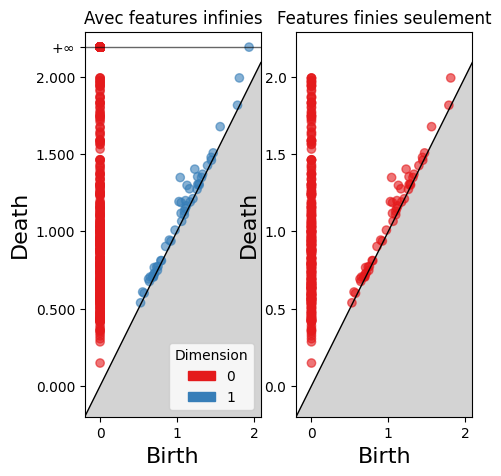

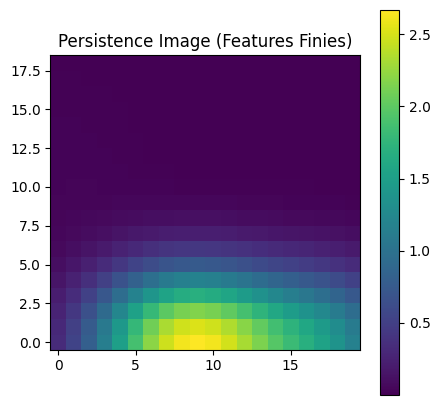

5712

In [12]:
# ---------------------------
# 6. Calcul de persistance
# ---------------------------

if simplex_tree:
    persistence = simplex_tree.persistence()

    # Conversion et filtrage des valeurs infinies
    valid_persistence = []
    infinite_persistence = []

    for interval in persistence:
        birth = interval[1][0]
        death = interval[1][1]

        if death == float('inf'):
            infinite_persistence.append((birth, death))
        else:
            valid_persistence.append([birth, death])

    persistence_pairs = np.array(valid_persistence)

    # Analyse des features infinies
    print(f"Features persistantes totales : {len(persistence)}")
    print(f"Features infinies filtrées : {len(infinite_persistence)}")
    print(f"Features finies utilisées : {len(persistence_pairs)}")

    # Paramétrage manuel des plages pour PersistenceImager
    pimgr = PersistenceImager(
        pixel_size=0.1,
        birth_range=(np.min(persistence_pairs[:,0]), np.max(persistence_pairs[:,0])),
        pers_range=(0, np.max(persistence_pairs[:,1] - persistence_pairs[:,0])),
        kernel_params={'sigma': 0.1}
    )

    # Visualisation comparée
    fig, axs = plt.subplots(1, 2, figsize=(5,5))

    # Diagramme original avec infinis
    gd.plot_persistence_diagram(persistence, axes=axs[0])
    axs[0].set_title("Avec features infinies")

    # Diagramme filtré
    gd.plot_persistence_diagram(persistence_pairs, axes=axs[1])
    axs[1].set_title("Features finies seulement")

    plt.show()

    # Génération de l'image
    pimgr.fit(persistence_pairs)
    persistence_image = pimgr.transform(persistence_pairs)

    plt.figure(figsize=(5,5))
    plt.imshow(persistence_image, cmap='viridis', origin='lower')
    plt.title("Persistence Image (Features Finies)")
    plt.colorbar()
    plt.show()

else:
    print("Échec de la construction du complexe simplicial")

# Nettoyage mémoire
gc.collect()


 Les **points éloignés** de la diagonale signifient qu'on a des	structures topologiques persistantes (motifs récurrents importants). Les
**points proches** de la diagonale sont du 	bruit ou variations éphémères.
**H0 (dimension 0)** représente le	nombre de clusters naturels dans les fenêtres. **H1 (dimension 1)** c'est la	présence de cycles/oscillations (potentiels motifs périodiques).

Les diagrammes nous ont donné des indications mais ne suffisent pas pour prédire directement les performances d'un modèle de classification.

Nous allons continuer notre analyse en regardant les **fonctions landscape et les courbes de Betti** car elles peuvent aider à évaluer si notre jeu de données possède des structures topologiques discriminantes qui pourraient être utiles pour une classification efficace. Car si les **features topologiques** séparent bien les classes , cela augmente les chances d'une classification efficace.

Les **persistence landscapes** sont des résumés fonctionnels des diagrammes de persistance qui convertissent les paires naissance-mort en une séquence de fonctions, les rendant ainsi plus faciles à utiliser dans les modèles d'apprentissage automatique. **Les courbes de Betti** suivent le nombre de caractéristiques topologiques (comme les composantes connexes et les boucles) à différentes échelles. Ces deux outils peuvent être utiles pour capturer des caractéristiques topologiques d'une manière compatible avec les algorithmes classiques de l'apprentissage automatique.


In [13]:
import numpy as np
from gudhi.representations import Landscape, BettiCurve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Calcul des caractéristiques topologiques
def compute_topological_features(persistence_pairs):
    # Paramétrage des transformations
    landscape = Landscape(num_landscapes=5, resolution=100)
    betti = BettiCurve(resolution=100)

    # Conversion en format adapté
    persistence_list = [persistence_pairs]

    # Calcul des features
    L = landscape.fit_transform(persistence_list)
    B = betti.fit_transform(persistence_list)

    return np.hstack([L, B])


**Courbe de Betti moyenne et Paysage de persistance moyen**

Pourquoi une courbe de Betti moyenne ?

Parce que ça présente les avantages de : **réduction du bruit**,
de **détection de motifs récurrents** (les pics persistants deviennent visibles) et **d'interprétabilité** (une seule courbe résume le comportement global).


Pourquoi un paysage de persistance moyen ?

Ca présente avantages de : **condensation de l’information** (les motifs fréquents sont renforcés), de **stabilité** (peu sensible aux outliers) et de **compatibilité ML**.  

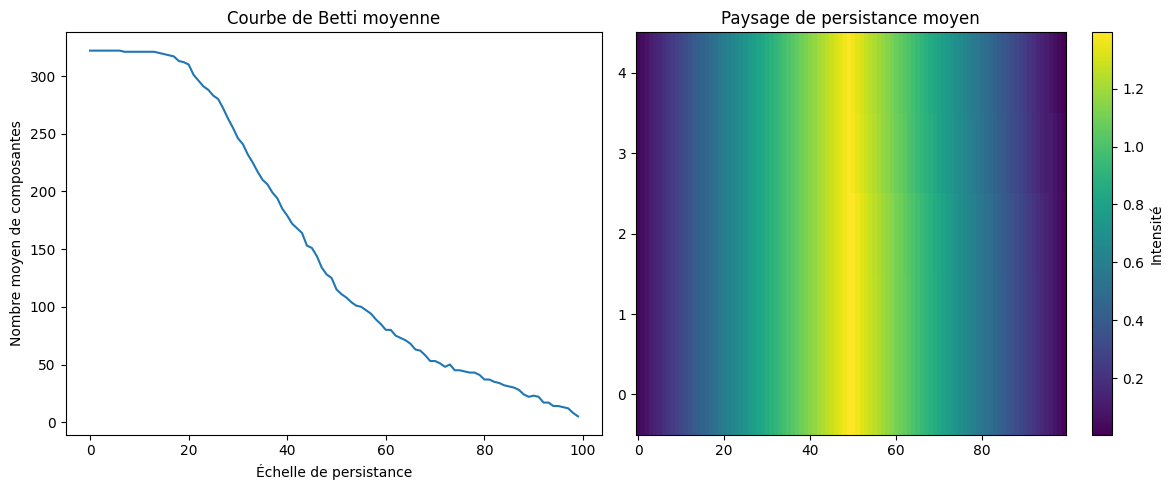

In [14]:
# ---------------------------
# 7. Calcul des caractéristiques topologiques
# ---------------------------
if len(persistence_pairs) > 0:
    # Calcul des caractéristiques
    topological_features = compute_topological_features(persistence_pairs)

    # Séparation des composantes
    L = topological_features[:, :500]  # 5 paysages * 100 points
    B = topological_features[:, 500:]  # Courbe de Betti (100 points)

    # Visualisation des courbes de Betti
    plt.figure(figsize=(12, 5))

    # Courbe de Betti moyenne
    plt.subplot(121)
    plt.plot(B.mean(axis=0))
    plt.title("Courbe de Betti moyenne")
    plt.xlabel("Échelle de persistance")
    plt.ylabel("Nombre moyen de composantes")

    # Paysage de persistance moyen
    plt.subplot(122)
    plt.imshow(L.mean(axis=0).reshape(5, 100),
               cmap='viridis',
               aspect='auto',
               origin='lower')
    plt.title("Paysage de persistance moyen")
    plt.colorbar(label='Intensité')

    plt.tight_layout()
    plt.show()




Les indicateurs clés que nous regardons pour prevoir si oui ou non on aura une bonne classification sont :
- **la Persistance des features  (échelles >60):** Les structures qui persistent à grande échelle (ex: un cluster stable) sont des marqueurs fiables de classe. Elles ont un **fort impact** sur la classification car c'est **robuste au bruit**.
- **Pic d’intensité à 40–60 :** Ceci indique une zone où les caractéristiques topologiques sont à la fois denses et discriminantes. Par exemple les motifs récurrents. ça a un impact **très fort** sur la classification qui peut être interpréter comme une signature unique.
- **Déclin rapide (<20) :** Les petites structures instables  ne sont pas vraiment exploitables.

En conclusion le potentiel de classification semble être modérément bon (⭐️⭐️⭐️/5)